## <a class="anchor" id="4"></a> Проект. Исследовательский анализ данных (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Расшифровка полей:
<li>'reg_code' - код региона 
<li>'рregion_name' - название региона
<li>'road_code' - код дороги
<li>'road_name' -  название дороги
<li>'road_type' - тип дороги
<li>'address' -  Адрес
<li>'crash_type_name' - тип ДТП
<li>'crash_date' - дата ДТП
<li>'crash_time' - время ДТП
<li>'crash_reason' - причина ДТП
<li>'fatalities_amount' - число погибших
<li>'victims_amount' - число пострадавших
<li>'vehicles_amount' - число транспортных средств
<li>'participants_amount' - число участников
<li>'datetime' - дата и время ДТП
<li>'crash_date_day' - день недели
<li>''wait_time' - время ожидания в минутах

<b>Задача</b><br>
Для составления аналитического отчета о безопасности дорог в РФ и принятию управленческих решений о планировании модернизации дорожной сети необходимо исследовать и подготовить данные по вопросам:
1. Найти регионы с наибольшей аварийностью.
2. Определить распределение числа ДТП по типам дорог, по видам ДТП.
3. Исследовать зависимость числа ДТП от дня недели.
4. Определить регионы с наибольшей аварийностью, числом погибших, пострадавших, участников ДТП.
5. Исследовать время ожидания сотрудников ДПС.
6. Исследовать число участников ДТП.
7. Исследовать ДТП в ночное время суток.
8. Определить наиболее опасные дороги.




<b>1. Регионы с наибольшей аварийностью

Загружаем файл <code>dtp_good.xlsx</code>

In [2]:
data = pd.read_excel('dtp_good.xlsx')

In [3]:
data.info()
# общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39085 entries, 0 to 39084
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   reg_code             39085 non-null  int64         
 1   region_name          39085 non-null  object        
 2   road_code            39085 non-null  object        
 3   road_name            39085 non-null  object        
 4   road_type            39085 non-null  object        
 5   address              39085 non-null  object        
 6   crash_type_name      39085 non-null  object        
 7   crash_date           39085 non-null  int64         
 8   crash_time           39085 non-null  object        
 9   crash_reason         39085 non-null  object        
 10  fatalities_amount    39085 non-null  int64         
 11  victims_amount       39085 non-null  int64         
 12  vehicles_amount      39085 non-null  int64         
 13  participants_amount  39085 non-

In [4]:
data.head(3)
# первые три строки

,reg_code,region_name,road_code,road_name,road_type,address,crash_type_name,crash_date,crash_time,crash_reason,fatalities_amount,victims_amount,vehicles_amount,participants_amount,datetime,crash_date_day,wait_time
0,46,Московская область,отсутствует,мкр. Авиационный-Лямцино-ММК,Региональная или межмуниципальная дорога общег...,"ЦФО, Московская область, Городской округ Домод...",Опрокидывание,20181231,23:55:00,Другие нарушения ПДД водителями,1,0,1,12,2018-12-31 23:55:00,Понедельник,143.807252
1,53,Оренбургская область,53К-2118000,Обход г. Оренбурга,Региональная или межмуниципальная дорога общег...,"ПФО, Оренбургская область, Оренбург",Наезд на препятствие,20181231,23:55:00,Другие нарушения ПДД водителями,1,0,1,2,2018-12-31 23:55:00,Понедельник,148.198679
2,46,Московская область,А-107,"""Московское малое кольцо"" Икша - Ногинск - Бро...",Федеральная дорога общего пользования,"ЦФО, Московская область, Дмитровский район",Опрокидывание,20181231,23:40:00,Превышение установленной скорости движения,1,0,1,2,2018-12-31 23:40:00,Понедельник,71.441987


На этапе предобработки данные были подготовлены для исследования, были добавлены новые столбцы с датой и временем и днем недели.
<i>Сколько всего случаев ДТП?

In [5]:
# размер датасета
data.shape 

(39085, 17)

Всего случаев ДТП 39085

Посмотрим как они распределены по регионам

In [6]:
dtp_count = data['region_name'].value_counts().sort_values(ascending=True)
dtp_count # количество ДТП по регионам

Республика Ингушетия                 82
Магаданская область                  82
Ямало-Ненецкий автономный округ      86
Томская область                      89
Севастополь                          90
                                   ... 
Ставропольский край                 956
Республика Башкортостан            1075
Ленинградская область              1425
Краснодарский край                 2294
Московская область                 2764
Name: region_name, Length: 83, dtype: int64

Визуализируем данные

Здесь лучше всего подойдет горизонтальная или столбчатая диаграмма.

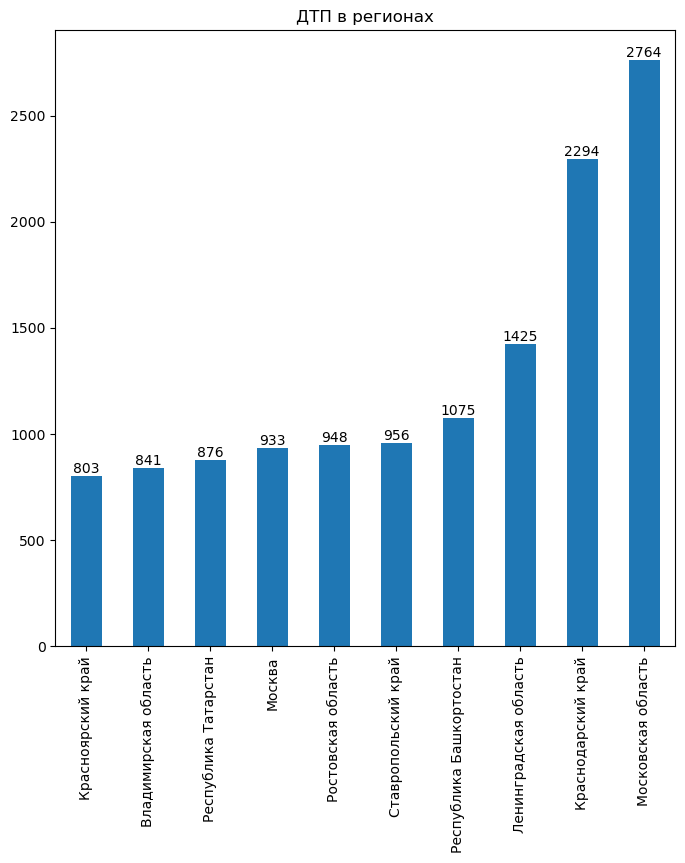

In [7]:
ax = dtp_count.tail(10).plot(kind='bar',
                        figsize=(8,8),
                        title='ДТП в регионах',
                        legend=False
                       )
ax.bar_label(ax.containers[0]) #padding-отступ,  fmt # '{:,.2f}'
plt.show()

График информативен, добавим в <code>dtp_count</code> относительные значения.

In [8]:
dtp_count = dtp_count.reset_index() # reset index для того, чтобы далее переименовать столбцы
dtp_count.columns = ['region_name', 'dtp_count'] # переименовали названия столбцов

dtp_count['perc'] = (dtp_count['dtp_count'] / dtp_count['dtp_count'].sum() * 100).round(2) # процент ДТП в общем количестве ДТП
dtp_count

,region_name,dtp_count,perc
0,Республика Ингушетия,82,0.21
1,Магаданская область,82,0.21
2,Ямало-Ненецкий автономный округ,86,0.22
3,Томская область,89,0.23
4,Севастополь,90,0.23
...,...,...,...
78,Ставропольский край,956,2.45
79,Республика Башкортостан,1075,2.75
80,Ленинградская область,1425,3.65
81,Краснодарский край,2294,5.87


Реализуем график, добавив относительные значения в процентах.

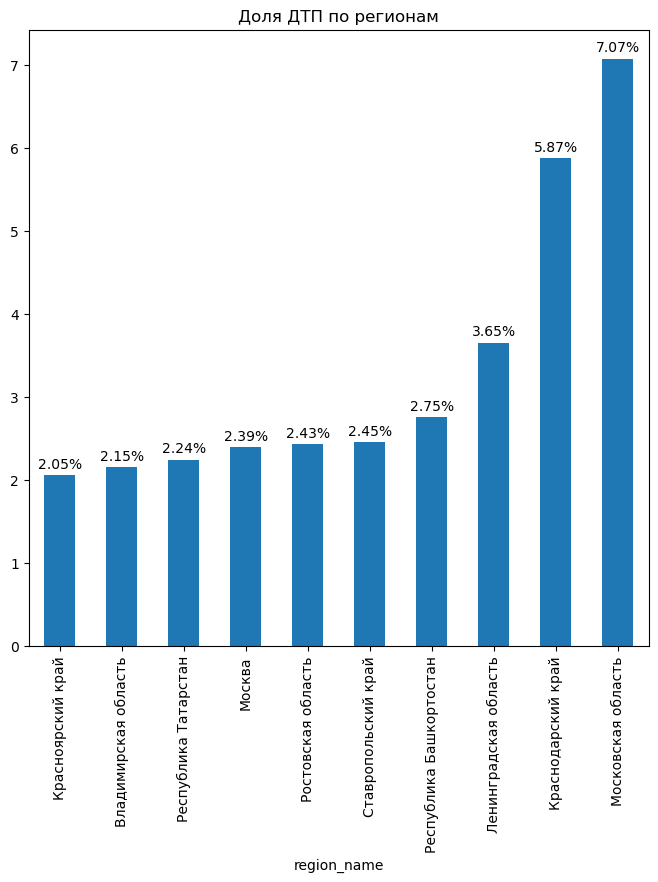

In [9]:
ax = dtp_count.tail(10).plot(kind = 'bar',
                             figsize= (8,8),
                             title = 'Доля ДТП по регионам',
                             legend = False,
                             x='region_name',
                             y='perc')

ax.bar_label(ax.containers[0], fmt='%.2f%%',padding=3) #padding-отступ,  fmt # '{:,.2f}'
plt.show()

<b>Вывод
<div class="alert alert-block alert-success">
    
В лидерах вовсе не Москва и не Санкт-Петербург, как мы могли предположить. Неожиданный результат всегда настораживает, возможно в данных есть ошибка или аномалии, которые не были обнаружены на этапе предобработки, а может быть с данным все в порядке и продолжив исследование мы найдем причину.

<h4> Задание_1

<b>2. Определить распределение числа ДТП по типам дорог, по видам ДТП.

2.1  Постройте столбчатую диаграмму числа ДТП по типам дорог.<br>
2.2  Постройте столбчатую диаграмму числа ДТП по видам ДТП, оставьте топ-5.

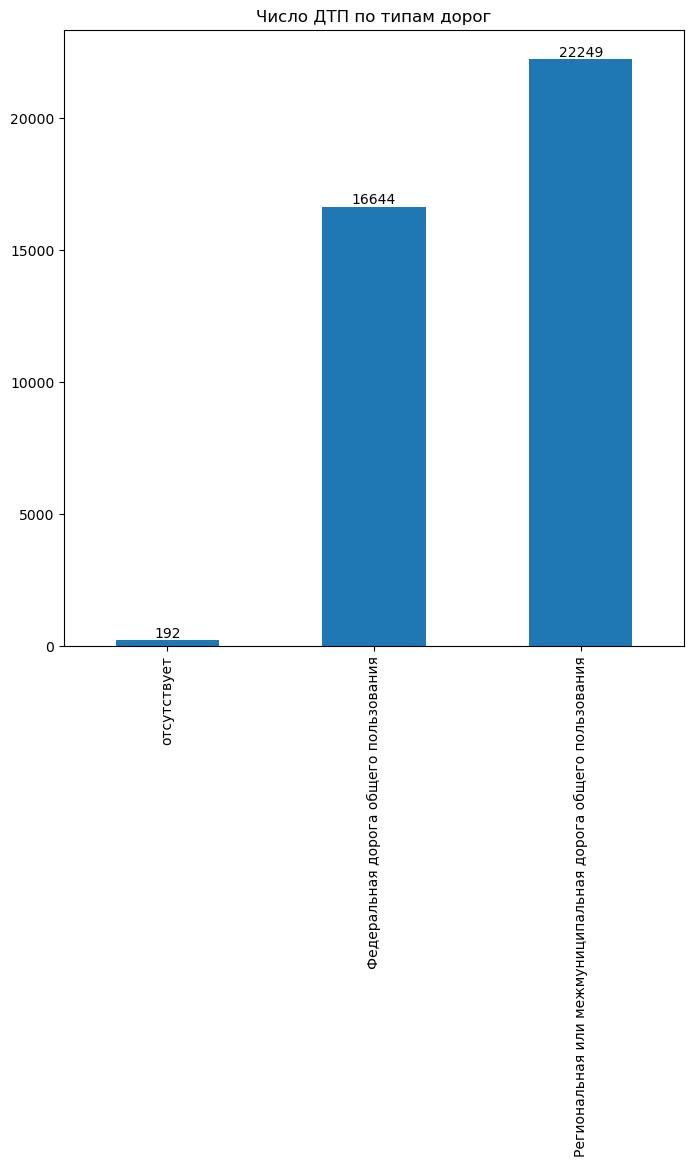

In [10]:
# 2.1
dtp_count_road_type = data['road_type'].value_counts().sort_values(ascending=True)
ax = dtp_count_road_type.plot(kind='bar',
                                 figsize=(8,8),
                                 title='Число ДТП по типам дорог',
                                 legend=False)
ax.bar_label(ax.containers[0]) #  вывели значения баров на график
plt.show()

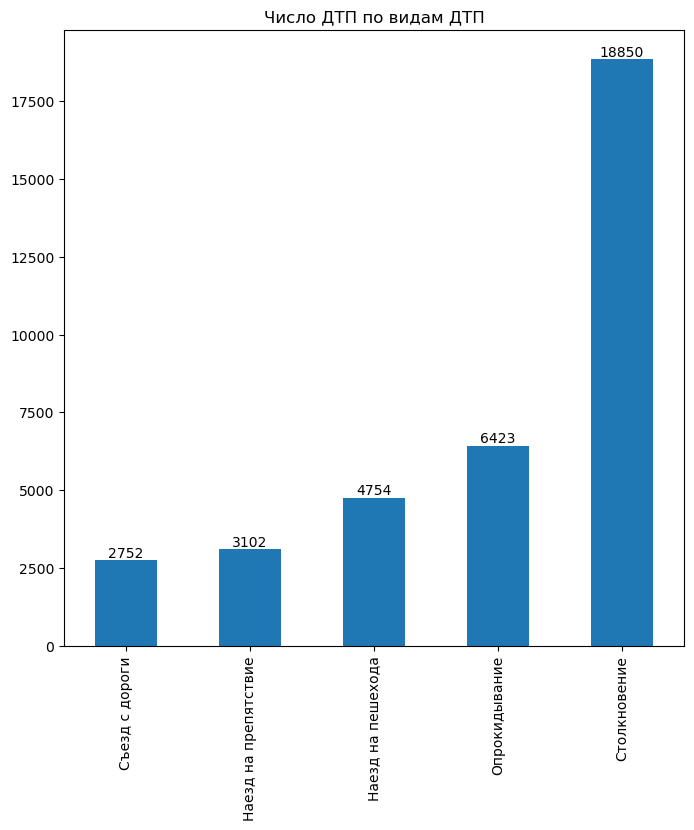

In [11]:
# 2.2
dtp_count_crash_type_name = data['crash_type_name'].value_counts().sort_values(ascending=True)
ax = dtp_count_crash_type_name.tail(5).plot(kind='bar',
                                   figsize=(8,8),
                                   title='Число ДТП по видам ДТП',
                                   legend=False)
ax.bar_label(ax.containers[0])
plt.show()

<b>Вывод
<div class="alert alert-block alert-success">
    
1. Число ДТП больше на региональных дорогах, чем на федеральных. Это связано с тем, что (по состоянию на 2016 год, источник: http://government.ru/info/22865/#:~:text=В%20настоящее%20время%20сеть%20автомобильных,км%20–%20дороги%20местного%20значения) протяжённость дорог федерального значения составляла 51,9 тыс. км,  регионального значения - 515,8 тыс. км (то есть протяжённость дорог федерального значения почти в 10 раз меньше протяжённости региональных дорог); таким образом, вероятность ДТП на региональной дороге существенно выше, чем на федеральной. Также на количество ДТП сказывается качество дорог. Понятно, что, как правило, дороги федерального значения более качественные, чем региональные; поэтому и число ДТП на последних ниже.
2. 48% всех ДТП - столкновение (обычно с другим транспортным средством). Следом идёт опрокидывание (16%), затем - наезд на пешехода (12%).

<b>3. Исследовать зависимость числа ДТП от дня недели.

Постройте линейный график числа ДТП по дням недели (от понедельника к воскресенью). 
Добавьте подписи осей, сетку, установите стиль отображения.

In [12]:
days = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
dtp_count_crash_date_day = data['crash_date_day'].value_counts()
dtp_count_crash_date_day

Суббота        6602
Воскресенье    6522
Пятница        5902
Понедельник    5269
Вторник        4958
Четверг        4946
Среда          4886
Name: crash_date_day, dtype: int64

In [13]:
new_df = pd.DataFrame(data=dtp_count_crash_date_day, index=days) # Для правильной сортировки по дням недели задали список дней и передали его как index в конструктор pd.DataFrame.
new_df

,crash_date_day
Понедельник,5269
Вторник,4958
Среда,4886
Четверг,4946
Пятница,5902
Суббота,6602
Воскресенье,6522


In [14]:
new_df = new_df.reset_index()
new_df.columns = ['crash_date_day', 'dtp_count']
new_df

,crash_date_day,dtp_count
0,Понедельник,5269
1,Вторник,4958
2,Среда,4886
3,Четверг,4946
4,Пятница,5902
5,Суббота,6602
6,Воскресенье,6522


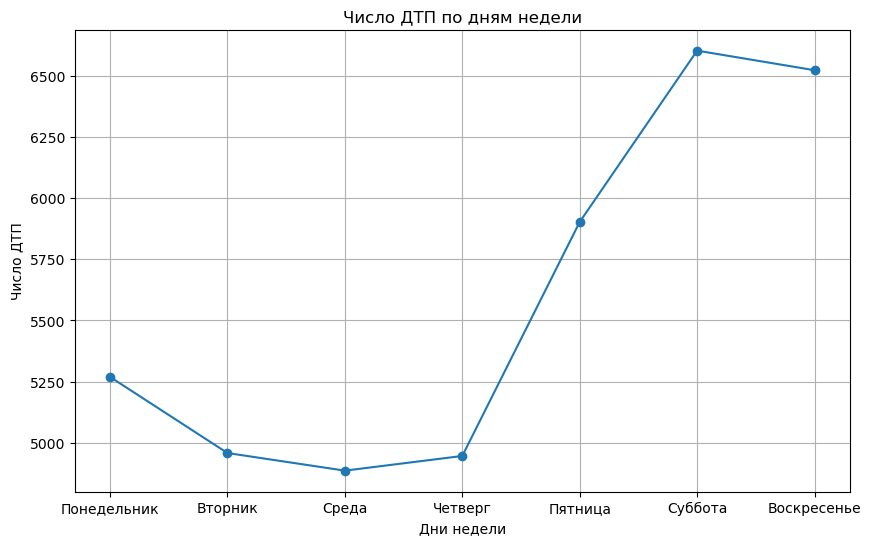

In [15]:
new_df.plot(x='crash_date_day',
           y='dtp_count',
           style='o-',
           grid=True,
           figsize=(10,6),
           title='Число ДТП по дням недели',
           xlabel='Дни недели',
           ylabel='Число ДТП',
           legend=False)

plt.show()

<b>Вывод
<div class="alert alert-block alert-success">
Резкий рост числа ДТП в пятницу - воскресенье. Это связано с тем, что именно в эти дни на дороге становится больше водителей, которые садятся за руль в состоянии алкогольного опьянения. Причиной также является усталость после рабочей недели, многие торопятся домой.

<b>4. Определить регионы с наибольшей аварийностью, числом погибших, пострадавших, участников ДТП.

Определите топ-5 регионов с наибольшим среднем значением числа погибших, числа пострадаших, числа транспортных средств, числа участников. Выведите на экран сводные таблицы и столбчатые диаграммы в цикле. Дополните код выводом названий графиков на русском языке.


In [16]:
def regions_max(amount_in_dtp):
    amount_max = data.pivot_table(index='region_name',
               aggfunc='mean',
               values=amount_in_dtp)
    amount_max = amount_max.sort_values(by=amount_in_dtp, ascending=True)
    ax = amount_max.tail(5).plot(kind='bar',
                        figsize=(8,8),
                        legend=False
                       )
    ax.bar_label(ax.containers[0])
    return print(amount_max.tail(5))
    return plt.show()

In [17]:
names_of_some_columns = ['fatalities_amount', 'victims_amount', 'vehicles_amount', 'participants_amount']

                       fatalities_amount
region_name                             
Волгоградская область           1.798419
Республика Дагестан             1.837037
Республика Калмыкия             1.867816
Республика Тыва                 1.942308
Республика Ингушетия            1.987805
                                 victims_amount
region_name                                    
Ростовская область                     0.322785
Ульяновская область                    0.343972
Республика Ингушетия                   0.353659
Кабардино-Балкарская Республика        0.406504
Чеченская Республика                   0.484536
                       vehicles_amount
region_name                           
Воронежская область           1.975806
Новосибирская область         2.024283
Волгоградская область         2.173913
Москва                        2.212219
Санкт-Петербург               2.357955
                     participants_amount
region_name                             
Мурманская область    

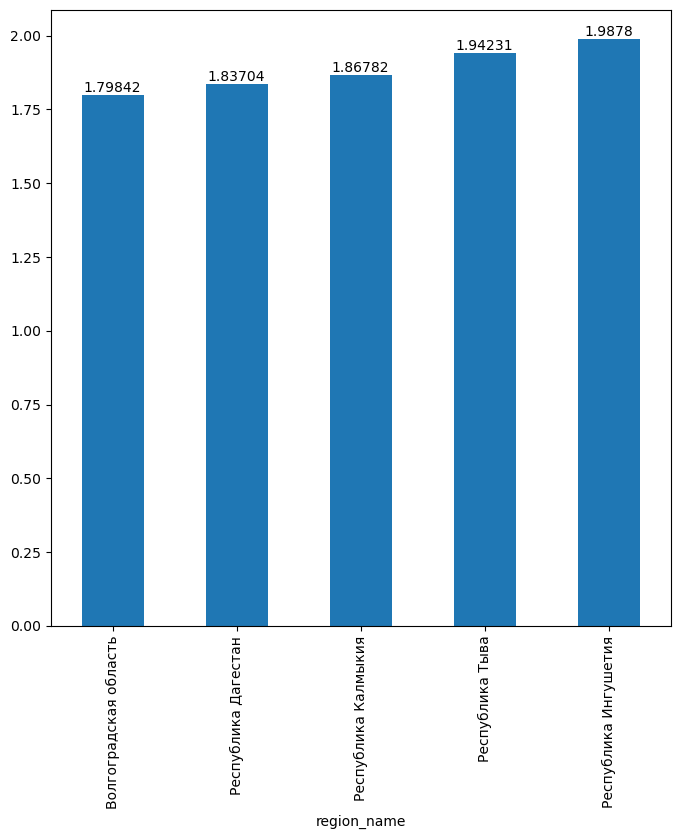

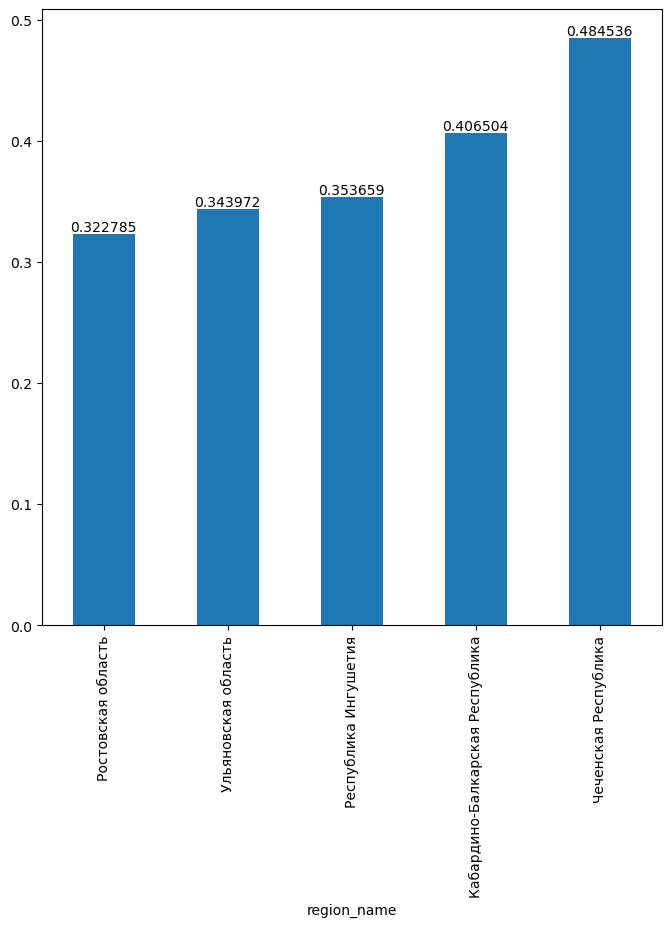

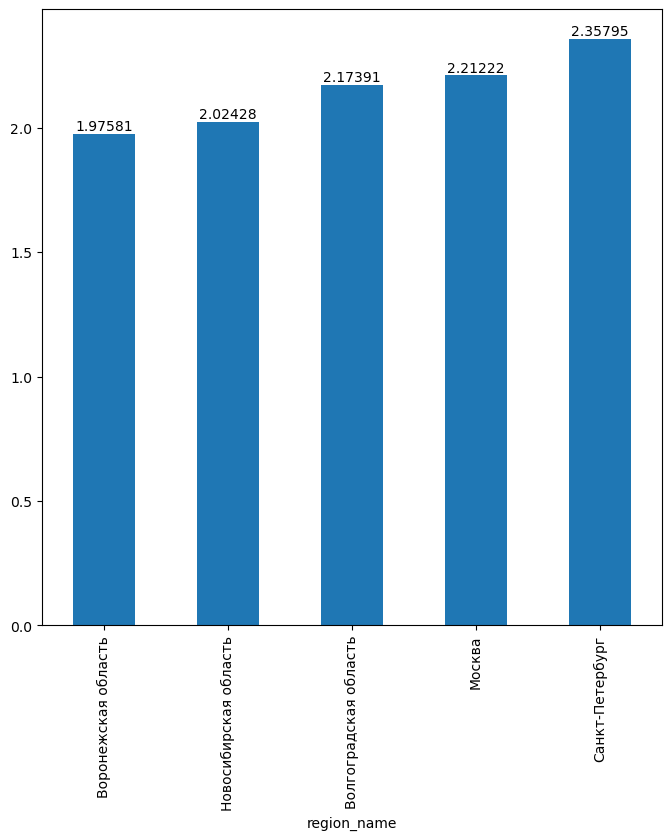

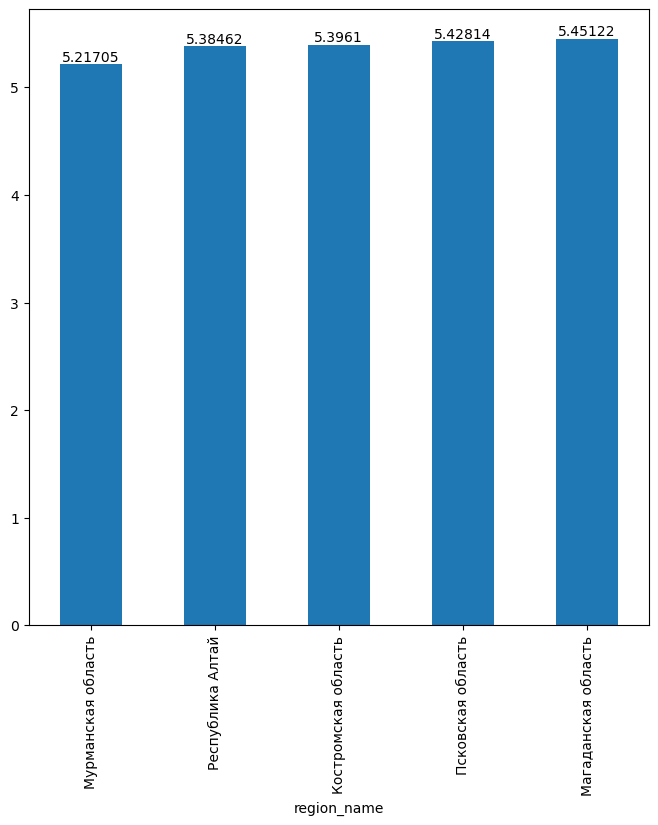

In [18]:
#4 без заголовков
for element in names_of_some_columns:
    regions_max(element)

In [19]:
def regions_max(amount_in_dtp, russian_title): # добавили второй аргумент russian_title
    amount_max = data.pivot_table(index='region_name',
               aggfunc='mean',
               values=amount_in_dtp)
    amount_max = amount_max.sort_values(by=amount_in_dtp, ascending=True)
    ax = amount_max.tail(5).plot(kind='bar',
                        figsize=(8,8),
                        title=russian_title,
                        legend=False
                       )
    ax.bar_label(ax.containers[0])
    return print(amount_max.tail(5))
    return plt.show()

In [20]:
names_of_some_columns = ['fatalities_amount', 'victims_amount', 'vehicles_amount', 'participants_amount']
meaning_of_columns = [['Среднее число погибших', 'Среднее число пострадавших', 'Среднее число транспортных средств', 'Среднее число участников']]
help_df = pd.DataFrame(data=meaning_of_columns, columns=names_of_some_columns)
help_df # создали вспомогательный датафрейм

,fatalities_amount,victims_amount,vehicles_amount,participants_amount
0,Среднее число погибших,Среднее число пострадавших,Среднее число транспортных средств,Среднее число участников


                       fatalities_amount
region_name                             
Волгоградская область           1.798419
Республика Дагестан             1.837037
Республика Калмыкия             1.867816
Республика Тыва                 1.942308
Республика Ингушетия            1.987805
                                 victims_amount
region_name                                    
Ростовская область                     0.322785
Ульяновская область                    0.343972
Республика Ингушетия                   0.353659
Кабардино-Балкарская Республика        0.406504
Чеченская Республика                   0.484536
                       vehicles_amount
region_name                           
Воронежская область           1.975806
Новосибирская область         2.024283
Волгоградская область         2.173913
Москва                        2.212219
Санкт-Петербург               2.357955
                     participants_amount
region_name                             
Мурманская область    

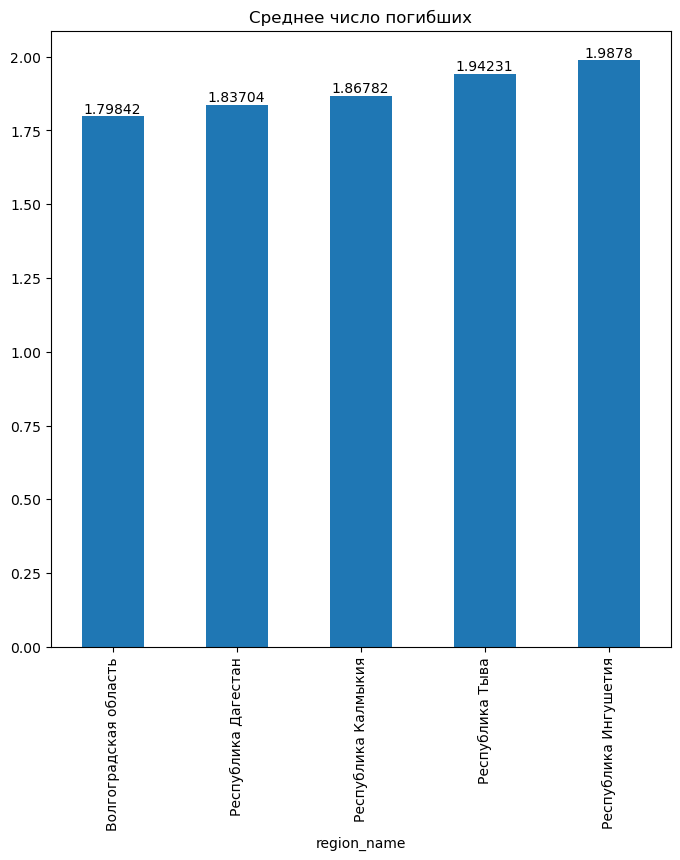

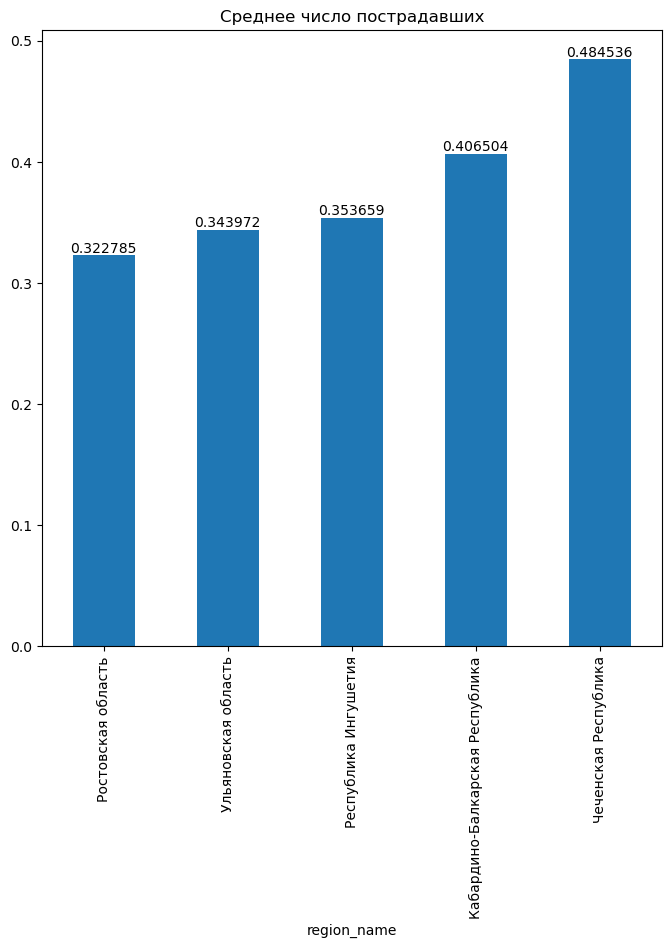

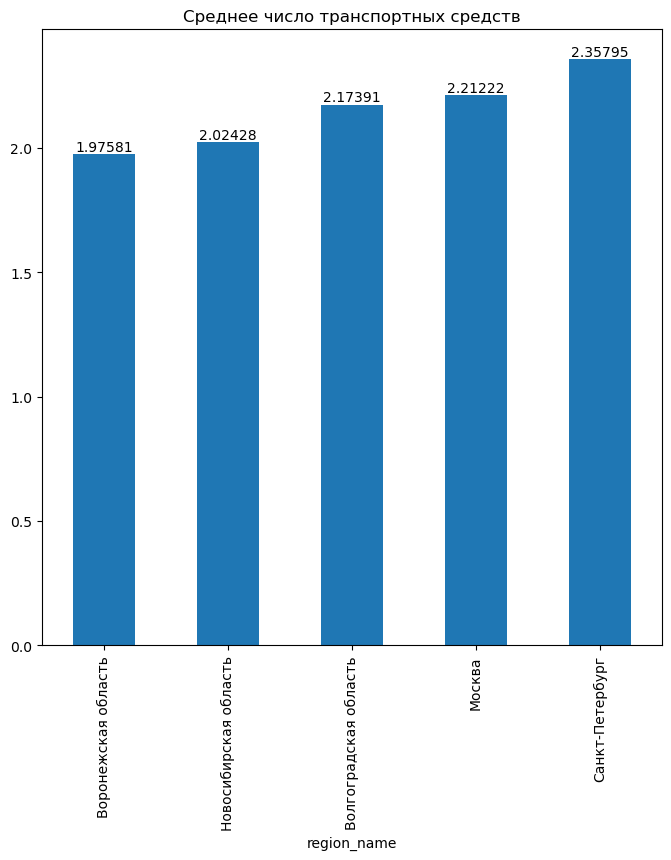

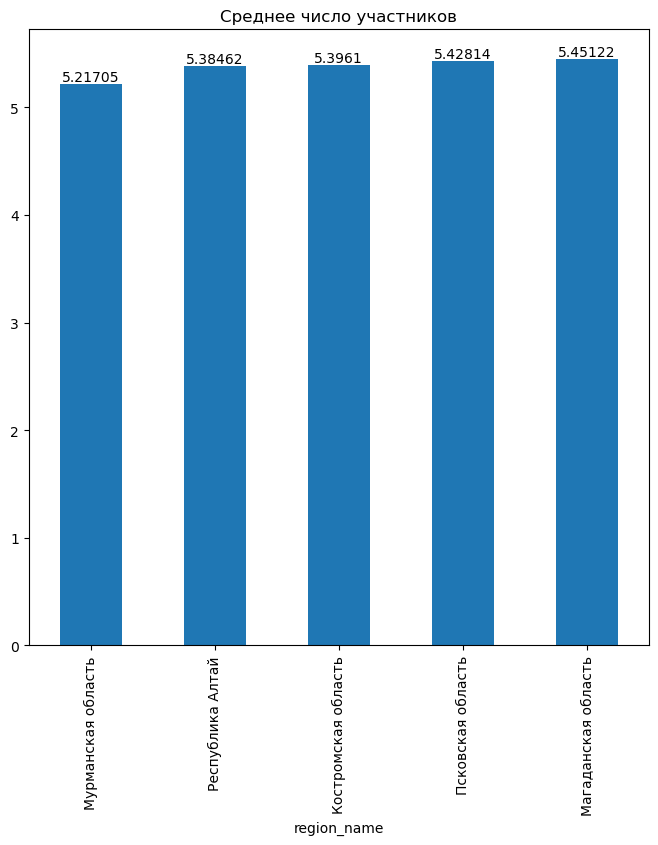

In [21]:
for element in names_of_some_columns:
    russian_title = help_df.loc[0, element]
    regions_max(element, russian_title)

<b>Вывод
<div class="alert alert-block alert-success">
    
1. Из полученных данных видно, что среднее число погибших в ДТП больше всего в Республике Ингушетия (в среднем в ДТП (в среднестатистическом ДТП) в Ингушетии погибает 2 человека).
2. Больше всего среднее число пострадавших в ДТП в Чеченской Республике (там в каждом втором ДТП есть пострадавший). 
3. Наибольшее среднее число транспортных средств, попавших в ДТП, в Санкт-Петербурге. В Санкт-Петербурге, Москве, Волгоградской области, Новосибирской области и Воронежской области в среднестатистическом ДТП оказываются более 2-х машин.
4. Среднее число участников ДТП больше всего в Магаданской области. Следом с небольшим отставанием идут Псковская область, Костромская область, Республика Алтай (в среднем более 5 участников ДТП в перечисленных регионах)

Определим также топ-5 регионов с наименьшим среднем значением числа погибших, числа пострадаших, числа транспортных средств, числа участников.

In [22]:
def regions_max(amount_in_dtp, russian_title): # добавили второй аргумент russian_title
    amount_max = data.pivot_table(index='region_name',
               aggfunc='mean',
               values=amount_in_dtp)
    amount_max = amount_max.sort_values(by=amount_in_dtp, ascending=False)
    ax = amount_max.tail(5).plot(kind='bar',
                        figsize=(8,8),
                        title=russian_title,
                        legend=False
                       )
    ax.bar_label(ax.containers[0])
    return print(amount_max.tail(5))
    return plt.show()

                              fatalities_amount
region_name                                    
Брянская область                       1.409357
Сахалинская область                    1.380952
Московская область                     1.379161
Москва                                 1.305466
Еврейская автономная область           1.298969
                     victims_amount
region_name                        
Республика Алтай           0.125874
Севастополь                0.100000
Магаданская область        0.097561
Москва                     0.094319
Санкт-Петербург            0.079545
                          vehicles_amount
region_name                              
Республика Бурятия               1.469880
Республика Алтай                 1.461538
Амурская область                 1.454849
Республика Саха (Якутия)         1.341346
Республика Тыва                  1.262821
                      participants_amount
region_name                              
Чеченская Республика             3

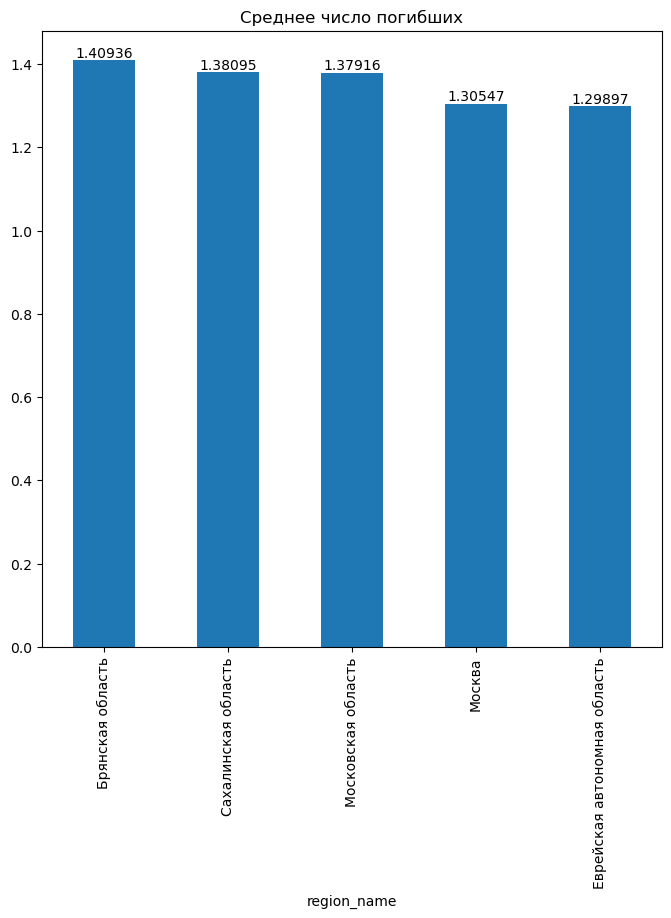

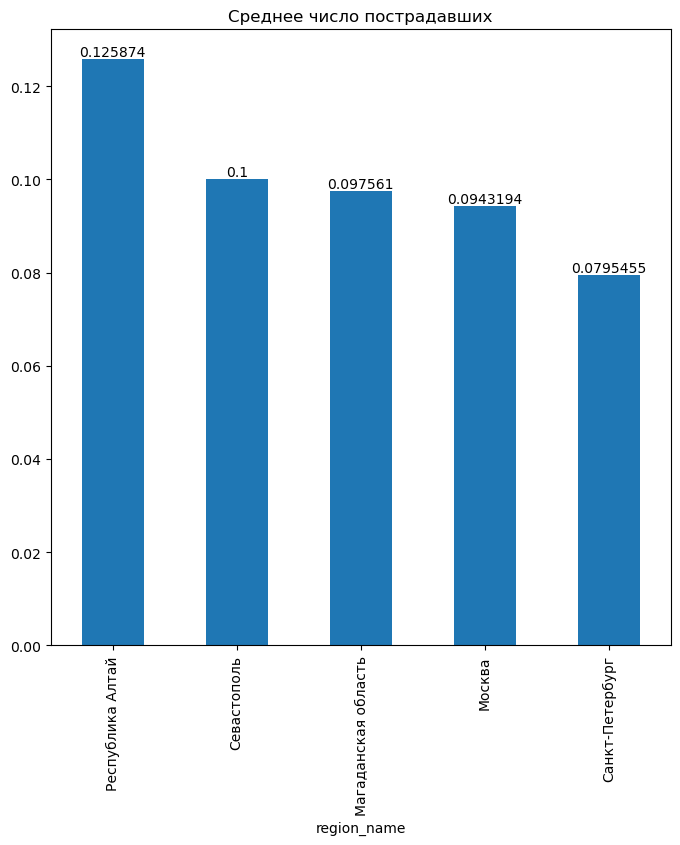

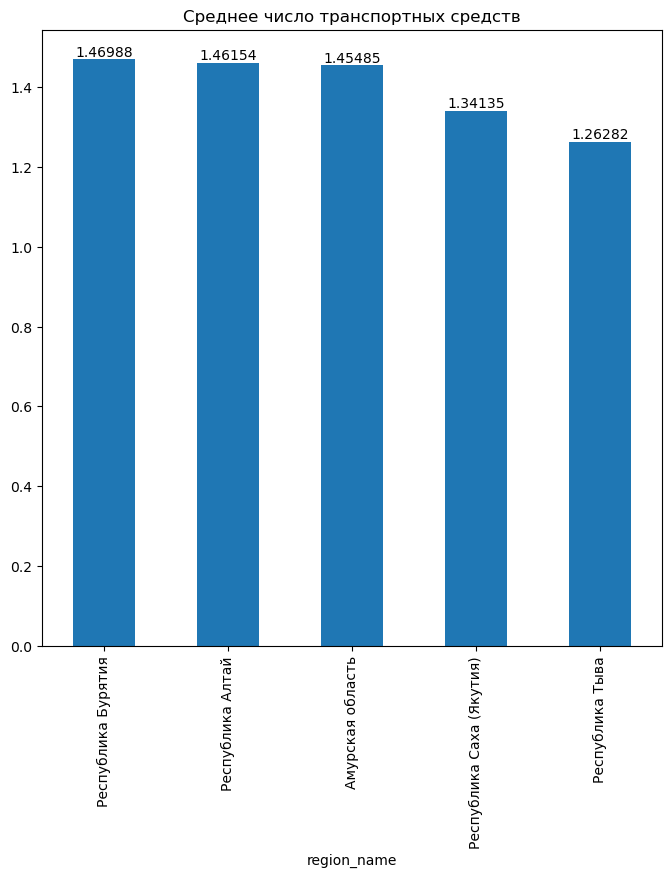

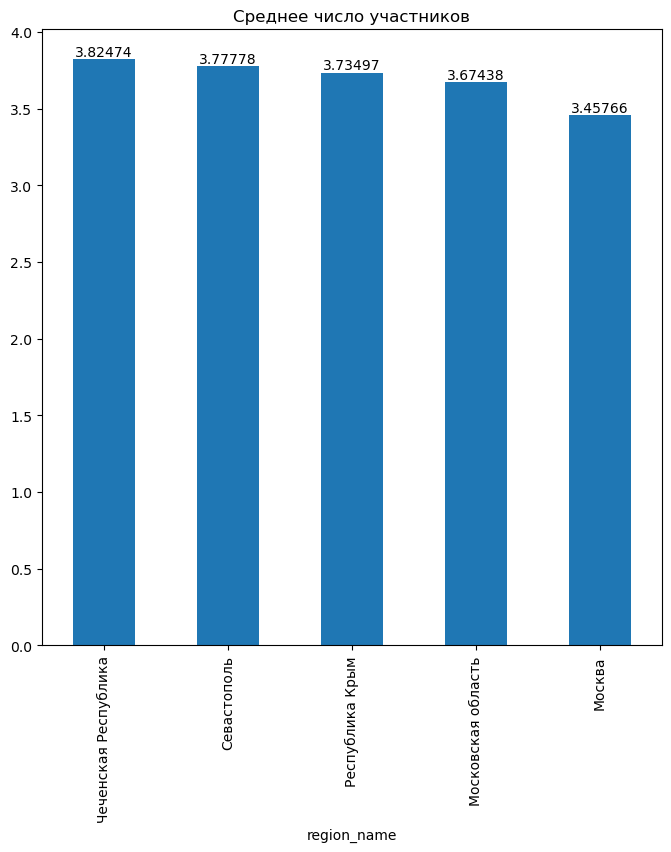

In [23]:
for element in names_of_some_columns:
    russian_title = help_df.loc[0, element]
    regions_max(element, russian_title)

<b>Вывод
<div class="alert alert-block alert-success">
    
По среднему значению числа погибших, пострадавших Москва занимает предпоследнее место, по среднему значению числа участников ДТП - последнее место. На первый взгляд, это может показаться абсурдным, ведь Москва очень густонаселённый город. Однако следует иметь в виду, что в городах разрешённая скорость - всего 60 км/ч. На такой скорости вероятность пострадать или погибнуть не слишком велика. Более того, из-за частых скоплений машин, пробок, транспортных коллапсов фактическая средняя скорость в Москве - 55 км/ч (источник: https://iz.ru/1436270/video/sredniaia-skorost-avtomobilei-v-moskve-vozrosla). Также большую роль играет строгая система контроля за водителями в Москве (в том числе с помощью фото- и видеофиксации). Мэр Москвы Сергей Собянин в мае 2023 года заявил: "Система фотовидеофиксации заработала в 2012 году. С тех пор количество погибших в ДТП на 100 тыс. населения снизилось в 3 раза" (источник: https://www.ntv.ru/msk/novosti/2765020/).

Можно также рассмотреть суммарные значения числа погибших, пострадавших, транспортных средств, участников ДТП.

In [24]:
def regions_max(amount_in_dtp, russian_title): # добавили второй аргумент russian_title
    amount_max = data.pivot_table(index='region_name',
               aggfunc='sum', # теперь тут сумма
               values=amount_in_dtp)
    amount_max = amount_max.sort_values(by=amount_in_dtp, ascending=True)
    ax = amount_max.tail(5).plot(kind='bar',
                        figsize=(8,8),
                        title=russian_title,
                        legend=False
                       )
    ax.bar_label(ax.containers[0])
    return print(amount_max.tail(5))
    return plt.show()

In [25]:
names_of_some_columns = ['fatalities_amount', 'victims_amount', 'vehicles_amount', 'participants_amount']
meaning_of_columns = [['Число погибших', 'Число пострадавших', 'Число транспортных средств', 'Число участников']]
help_df = pd.DataFrame(data=meaning_of_columns, columns=names_of_some_columns)
help_df # создали вспомогательный датафрейм

,fatalities_amount,victims_amount,vehicles_amount,participants_amount
0,Число погибших,Число пострадавших,Число транспортных средств,Число участников


                         fatalities_amount
region_name                               
Ставропольский край                   1499
Республика Башкортостан               1542
Ленинградская область                 2175
Краснодарский край                    3308
Московская область                    3812
                         victims_amount
region_name                            
Ленинградская область               282
Республика Башкортостан             299
Ростовская область                  306
Краснодарский край                  572
Московская область                  585
                         vehicles_amount
region_name                             
Республика Башкортостан             1797
Москва                              2064
Ленинградская область               2596
Краснодарский край                  4276
Московская область                  5232
                         participants_amount
region_name                                 
Ставропольский край                     40

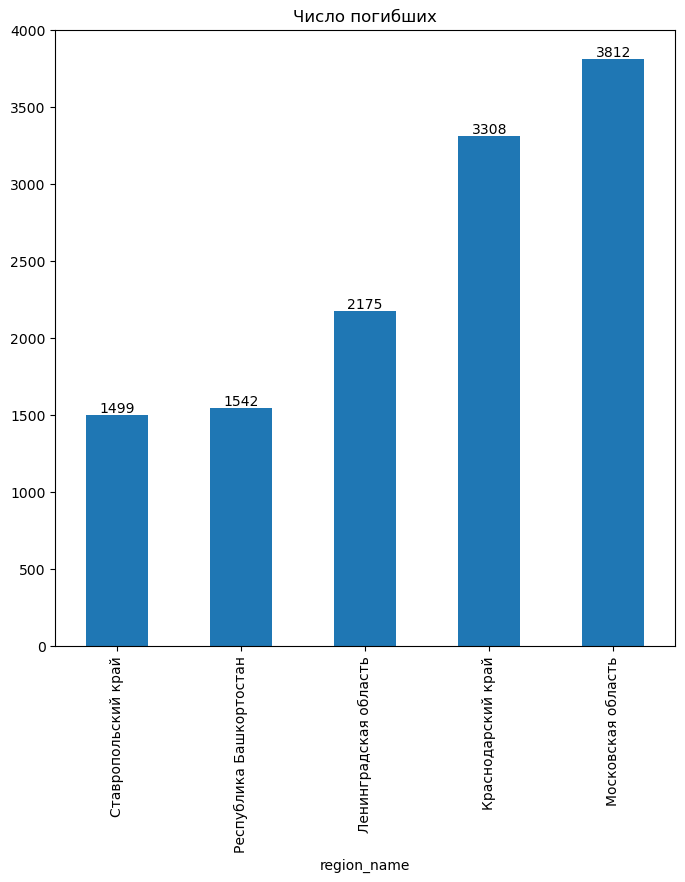

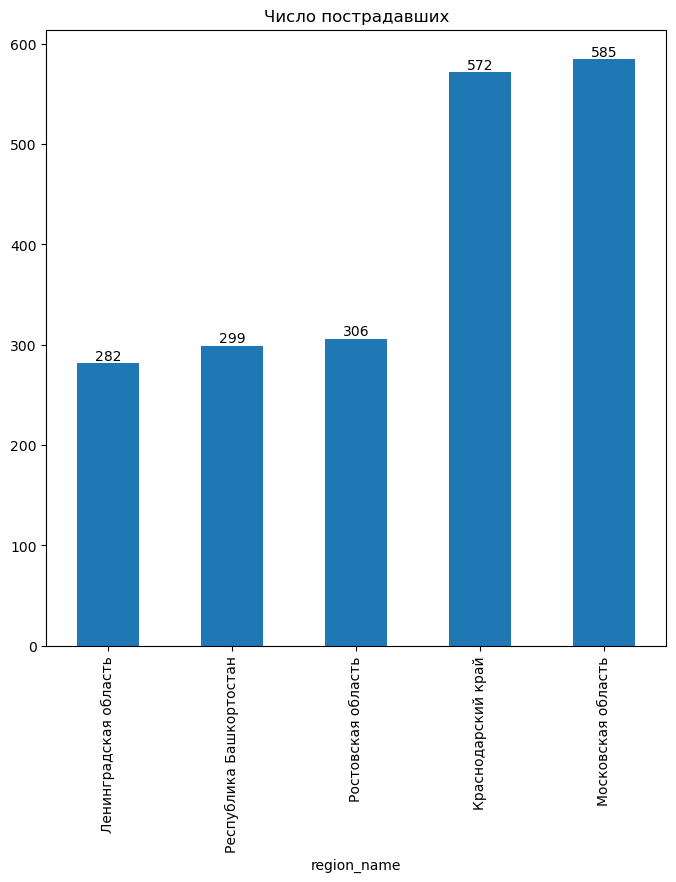

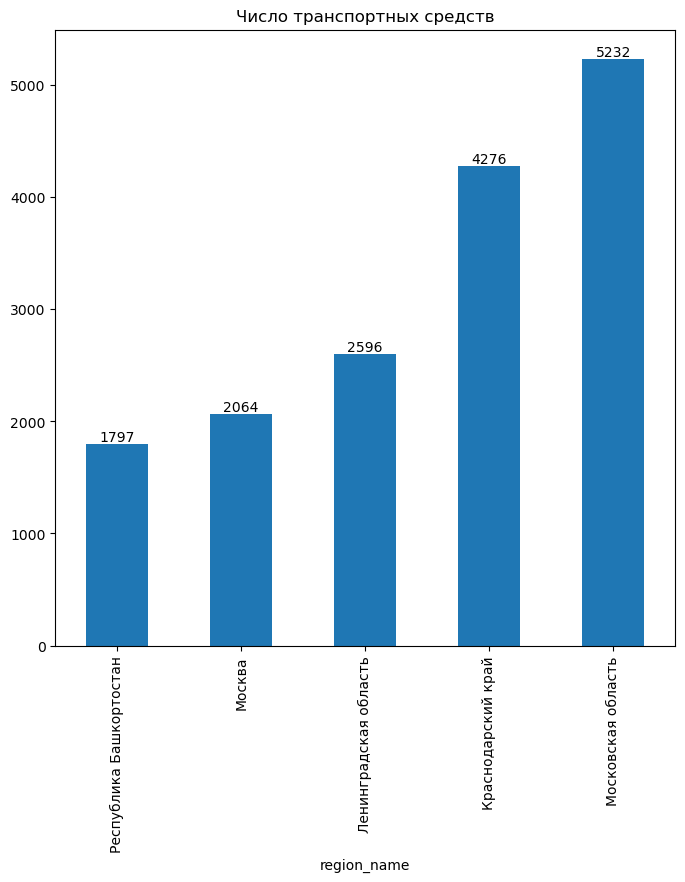

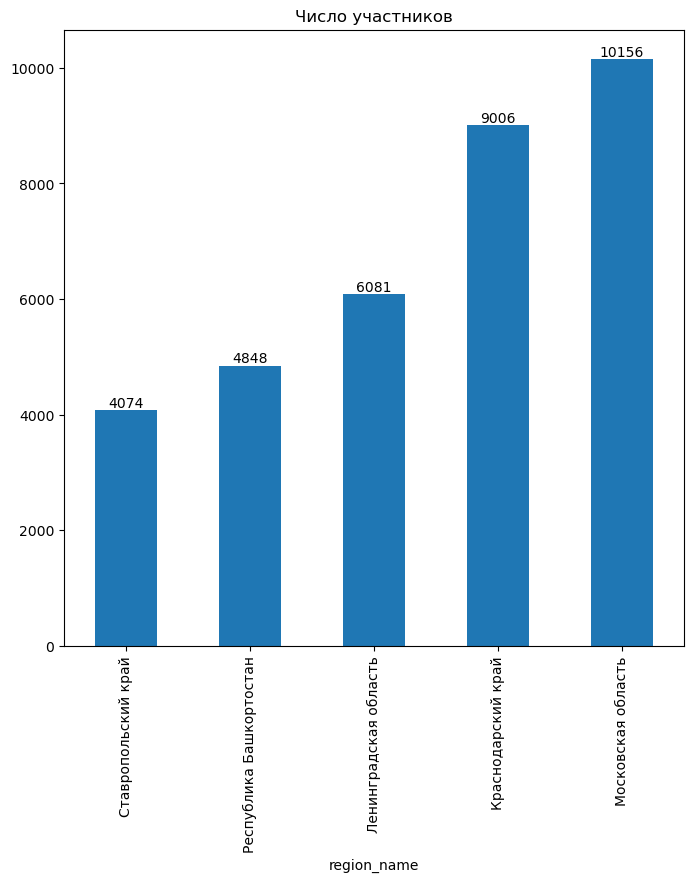

In [26]:
for element in names_of_some_columns:
    russian_title = help_df.loc[0, element]
    regions_max(element, russian_title)

<b>Вывод
<div class="alert alert-block alert-success">
    
Лидером по суммарному значению числа погибших, пострадавших, транспортных средств и участников ДТП является Московская область. Следом по всем этим перечисленным показателям идёт Краснодарский край. Это связано, в первую очередь, с тем, что в Московской области и Краснодарском крае количество ДТП значительно выше, чем в остальных регионах, как было рассмотрено на первой диаграмме в данном проекте.

<b> 5. Исследовать время ожидания сотрудников ДПС.

Построим гистограмму времени ожидания ДПС

<AxesSubplot:>

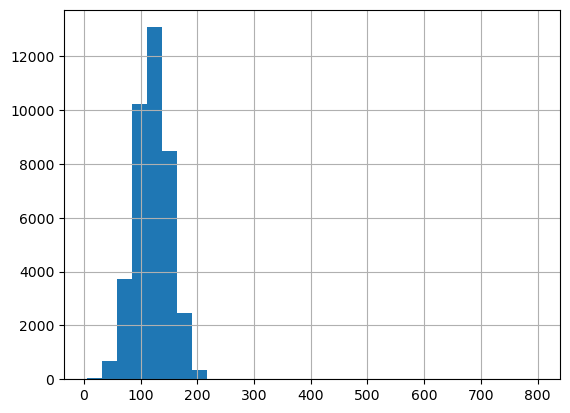

In [27]:
data['wait_time'].hist(bins=30)

In [28]:
data['wait_time'].mean() # среднее время ожидания ДПС

120.40589365334901

Среднее время ожидания ДПС - 120 минут. Ниже график будет приближен, и будет видно, что время ожидания имеет нормальное распределение. Это значит, что среднее время ожидания равно моде и равно медиане.

Ограничим график по оси x, указываем диапазон <code>range=(min, max)</code>

<AxesSubplot:>

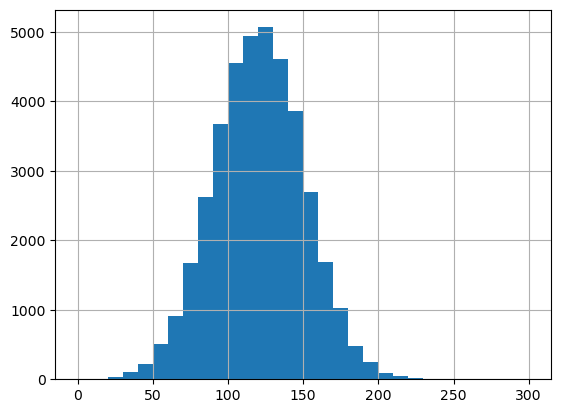

In [29]:
data['wait_time'].hist(bins=30, range=(0, 300))

Гистограмма похожа на нормальное распределение, теперь это лучше видно.
На первой гистограмме мы видели ось вплоть до 800 значений, но не видели значений. Что это означает?
Возможно, присутствуют единичные значения  в указанном диапазоне.
Посторим другой график - точечную диаграмму.<br>

<AxesSubplot:xlabel='region_name', ylabel='wait_time'>

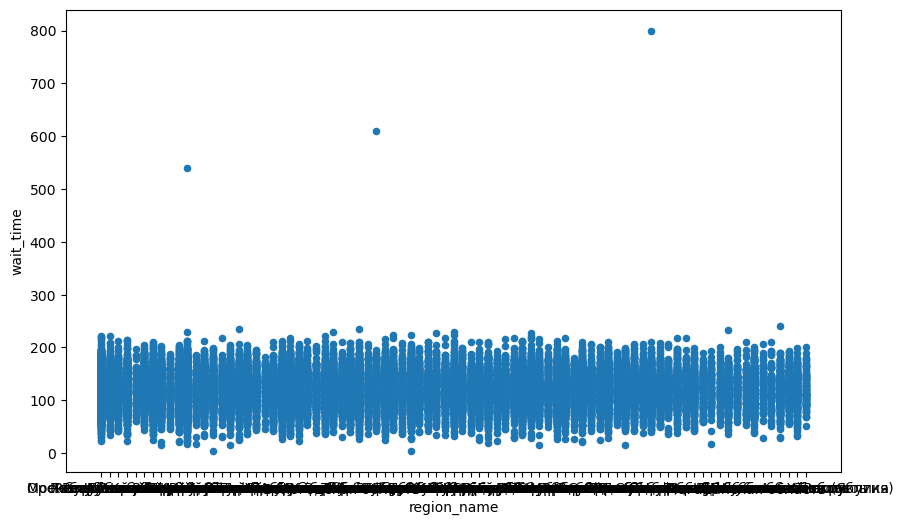

In [30]:
data.plot(kind='scatter',
          y='wait_time',
          x='region_name',
          figsize=(10, 6))

Действительно, на точечной диаграмме есть как минимум 3 очень отдалённых от основной массы значений. Есть и другие значения, которые отклоняются от основной массы, но их отклонение не кажется таким критичным.

Построим boxplot для времени ожидания

<AxesSubplot:>

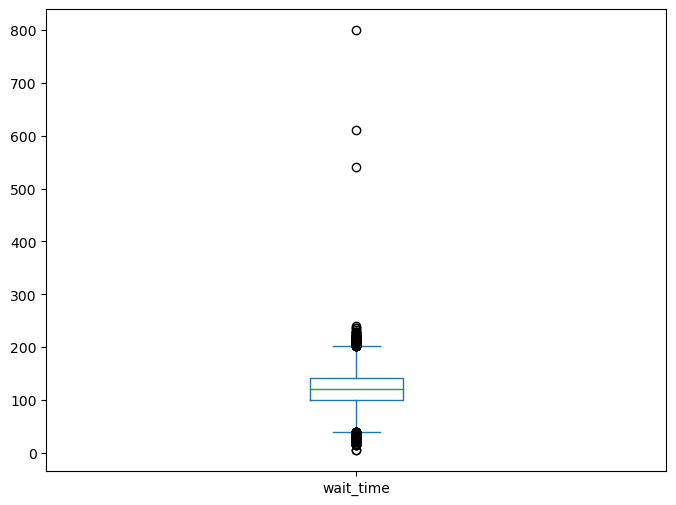

In [31]:
data['wait_time'].plot(kind='box', figsize=(8, 6)) 

В таком масштабе плохо виден сам ящик, зато мы видим хвост из выбросов  в диапазоне значений 0-40 и 200-250 и несколько 'экстремальных выбросов' за пределами 500 минут.
Увеличим масштаб с помощью <code>ylim()</code>

<AxesSubplot:>

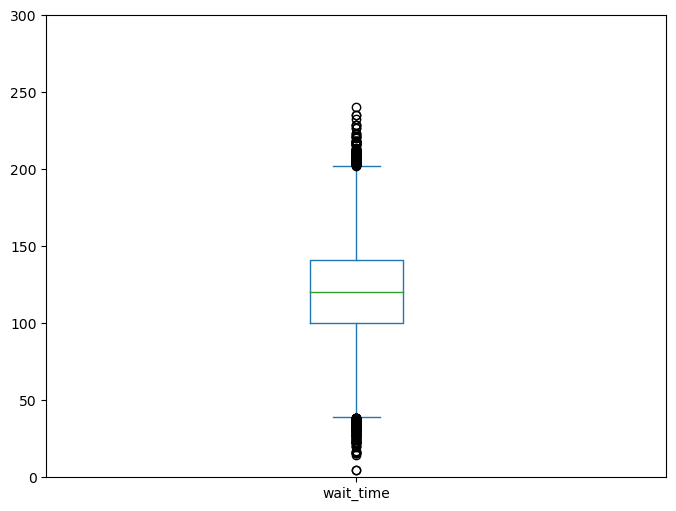

In [32]:
data['wait_time'].plot(kind='box',
                       figsize=(8, 6),
                       ylim=(0, 300)
                      )

In [33]:
data['wait_time'].describe()

count    39085.000000
mean       120.405894
std         30.347460
min          4.748831
25%        100.007374
50%        120.524415
75%        140.796472
max        800.000000
Name: wait_time, dtype: float64

Минимальное время ожидания 4.748831 минут, максимальное - 800.000000 минут. При этом среднее - 120.405894 минут. Получается слишком большой размах между максимальным и минимальным значениями (795.251169 минут).

In [34]:
q75 = np.percentile(data['wait_time'], 75) # 75-й перцентиль (3-й квартиль)
q25 = np.percentile(data['wait_time'], 25) # 25-й перцентиль (1-й квартиль)
iqr = q75 - q25 # межквартильный размах IQR
ejection_h = q75 + iqr * 1.5 # значение на верхней (правой) границе уса диаграммы размаха (box plot)
ejection_l = q25 - iqr * 1.5 # значение на нижней (левой) границе уса диаграммы размаха (box plot)

In [35]:
print (ejection_h, ejection_l)

201.9801186935365 38.823726829941734


Определим число выбросов.

In [36]:
n_ejection = data['wait_time'][(data['wait_time'] > ejection_h) | (data['wait_time'] < ejection_l)].count()
# число выбросов (число значений за пределами усов box plot)
print('Число выбросов:', n_ejection)

Число выбросов: 259


Было бы удобно завернуть это в функцию.

In [37]:
def ejection(col):
    q75 = np.percentile(data[col], 75) # 75-й перцентиль (3-й квартиль)
    q25 = np.percentile(data[col], 25) # 25-й перцентиль (1-й квартиль)
    iqr = q75 - q25 # межквартильный размах IQR
    ejection_h = q75 + iqr * 1.5 # значение на верхней (правой) границе уса диаграммы размаха (box plot)
    ejection_l = q25 - iqr * 1.5 # значение на нижней (левой) границе уса диаграммы размаха (box plot)
    ejection_count = data[col][(data[col] > ejection_h) | (data[col] < ejection_l)].count() # число выбросов
    ejection_perc = (ejection_count / len(data)) * 100 # процент выбросов от всего датасета
    return(ejection_h, ejection_l, ejection_count, ejection_perc)

In [38]:
ejection('wait_time')

(201.9801186935365, 38.823726829941734, 259, 0.662658308814123)

Теперь мы знаем все значения, число элементов и процент значений в датасете.

Не будем удалять эти записи из исходного датасета, лучше содадим новый без них.

In [39]:
# Выше мы нашли число выбросов, перевернем условия, чтобы отфильтровать датасет без них
good_data_wait_time = data[(data['wait_time'] < ejection('wait_time')[0]) & (data['wait_time'] > ejection('wait_time')[1])]
good_data_wait_time = good_data_wait_time.reset_index(drop=True)
good_data_wait_time.head(3)

,reg_code,region_name,road_code,road_name,road_type,address,crash_type_name,crash_date,crash_time,crash_reason,fatalities_amount,victims_amount,vehicles_amount,participants_amount,datetime,crash_date_day,wait_time
0,46,Московская область,отсутствует,мкр. Авиационный-Лямцино-ММК,Региональная или межмуниципальная дорога общег...,"ЦФО, Московская область, Городской округ Домод...",Опрокидывание,20181231,23:55:00,Другие нарушения ПДД водителями,1,0,1,12,2018-12-31 23:55:00,Понедельник,143.807252
1,53,Оренбургская область,53К-2118000,Обход г. Оренбурга,Региональная или межмуниципальная дорога общег...,"ПФО, Оренбургская область, Оренбург",Наезд на препятствие,20181231,23:55:00,Другие нарушения ПДД водителями,1,0,1,2,2018-12-31 23:55:00,Понедельник,148.198679
2,46,Московская область,А-107,"""Московское малое кольцо"" Икша - Ногинск - Бро...",Федеральная дорога общего пользования,"ЦФО, Московская область, Дмитровский район",Опрокидывание,20181231,23:40:00,Превышение установленной скорости движения,1,0,1,2,2018-12-31 23:40:00,Понедельник,71.441987


In [40]:
# Проверка лишней не бывает
print (len(data) - len(good_data_wait_time))

259


<AxesSubplot:>

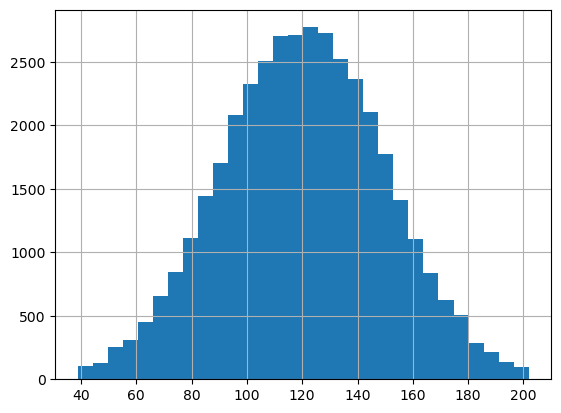

In [41]:
# Проверим, что изменилось на графиках
good_data_wait_time['wait_time'].hist(bins=30)

Теперь ось x больше не "растягивается" на удалённые от основной массы значения (выбросы).

In [42]:
# проверим describe
good_data_wait_time['wait_time'].describe()

count    38826.000000
mean       120.379495
std         29.160773
min         38.858157
25%        100.174698
50%        120.526717
75%        140.621013
max        201.878534
Name: wait_time, dtype: float64

Теперь минимальное время ожидания 38.858157 минут, максимальное - 201.878534 минут. Размах между максимальным и минимальным значениями теперь гораздо меньший (163.020377 минут).

<AxesSubplot:>

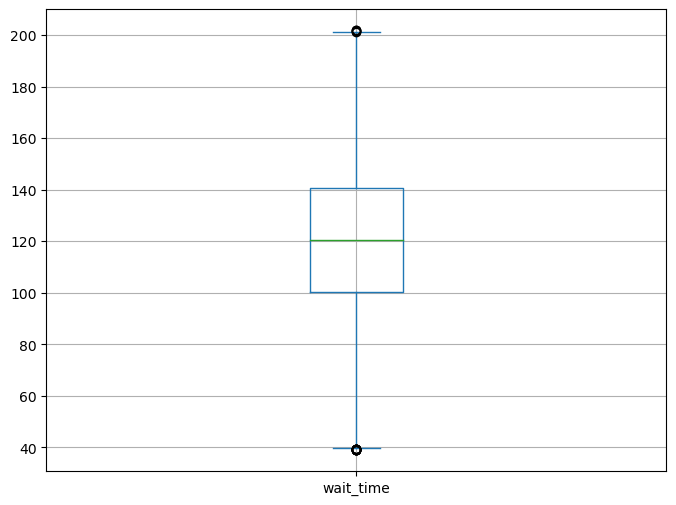

In [43]:
# построим box
good_data_wait_time['wait_time'].plot(kind='box', figsize=(8, 6), grid=True)

<AxesSubplot:xlabel='region_name', ylabel='wait_time'>

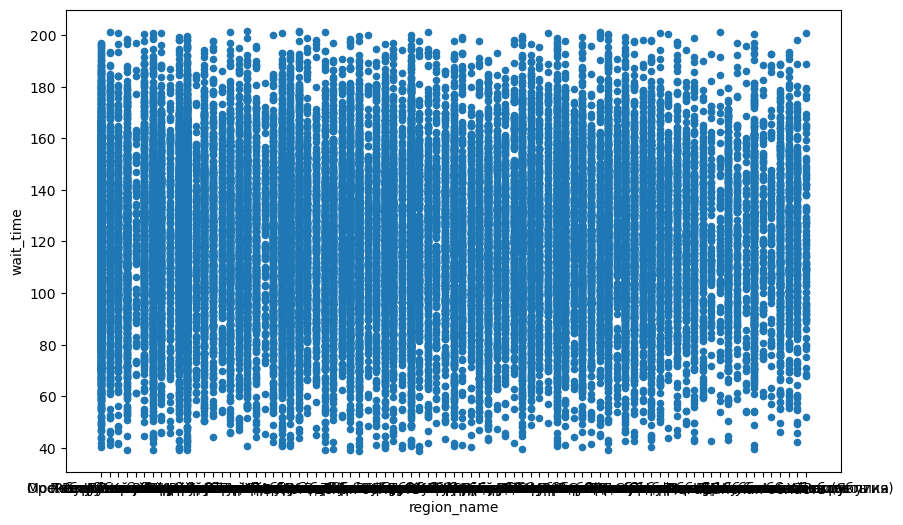

In [44]:
# построим scatter
good_data_wait_time.plot(kind='scatter',
                        x='region_name',
                        y='wait_time',
                        figsize=(10,6))

In [45]:
good_data_wait_time.head()

,reg_code,region_name,road_code,road_name,road_type,address,crash_type_name,crash_date,crash_time,crash_reason,fatalities_amount,victims_amount,vehicles_amount,participants_amount,datetime,crash_date_day,wait_time
0,46,Московская область,отсутствует,мкр. Авиационный-Лямцино-ММК,Региональная или межмуниципальная дорога общег...,"ЦФО, Московская область, Городской округ Домод...",Опрокидывание,20181231,23:55:00,Другие нарушения ПДД водителями,1,0,1,12,2018-12-31 23:55:00,Понедельник,143.807252
1,53,Оренбургская область,53К-2118000,Обход г. Оренбурга,Региональная или межмуниципальная дорога общег...,"ПФО, Оренбургская область, Оренбург",Наезд на препятствие,20181231,23:55:00,Другие нарушения ПДД водителями,1,0,1,2,2018-12-31 23:55:00,Понедельник,148.198679
2,46,Московская область,А-107,"""Московское малое кольцо"" Икша - Ногинск - Бро...",Федеральная дорога общего пользования,"ЦФО, Московская область, Дмитровский район",Опрокидывание,20181231,23:40:00,Превышение установленной скорости движения,1,0,1,2,2018-12-31 23:40:00,Понедельник,71.441987
3,8,Хабаровский край,А-375,"""Восток"" Хабаровск - Красный Яр - Ариадное - Ч...",Федеральная дорога общего пользования,"ДФО, Хабаровский край, Хабаровский район",Наезд на пешехода,20181231,23:20:00,Нахождение на проезжей части без цели её перех...,0,1,1,2,2018-12-31 23:20:00,Понедельник,143.569055
4,35,Республика Крым,35Н-076,Симферополь - Севастополь - Бахчисарай,Региональная или межмуниципальная дорога общег...,"ЮФО, Республика Крым, Бахчисарайский район",Наезд на пешехода,20181231,23:00:00,Нарушение правил проезда пешеходного перехода,1,0,1,2,2018-12-31 23:00:00,Понедельник,120.542764


Выбросы по признаку времени ожидания устранены. Данные готовы для проведения статистического анализа и/или построения модели прогноза времени ожидания сотрудников ДПС.

1. Определим регионы с максимальным отклонением среднего времени ожидания от среднего времени ожидания по стране.

In [46]:
# Добавим столбец с абсолютным отклонением среднего времени ожидания от среднего времени ожидания по стране
good_data_wait_time['time_deviation_sum'] = abs(good_data_wait_time['wait_time'] - good_data_wait_time['wait_time'].describe()['mean'])

In [47]:
# Создадим сводную таблицу, в которой каждому региону соответствует среднее по данному региону отклонение времени ожидания ДПС
table = good_data_wait_time.pivot_table(index='region_name',
                        aggfunc='mean',
                        values='time_deviation_sum')
table.columns = ['mean_time_deviation'] # переименовали столбец
table.reset_index(inplace=True)
table.sort_values(by='mean_time_deviation', ascending = False).head(10)

,region_name,mean_time_deviation
28,Магаданская область,26.433302
71,Томская область,25.862978
52,Республика Марий Эл,25.635638
77,Ханты-Мансийский автономный округ — Югра,25.180764
54,Республика Саха (Якутия),24.972772
24,Курганская область,24.937506
47,Республика Ингушетия,24.836424
32,Нижегородская область,24.759064
72,Тульская область,24.747860
16,Калужская область,24.614648


Получили ТОП-10 дорог с максимальным отклонением среднего времени ожидания от среднего времени ожидания по стране.

2. Построим гистограмму.

In [48]:
table['mean_time_deviation'].describe()

count    83.000000
mean     23.582864
std       0.980882
min      20.306288
25%      23.041370
50%      23.582619
75%      24.175033
max      26.433302
Name: mean_time_deviation, dtype: float64

<AxesSubplot:>

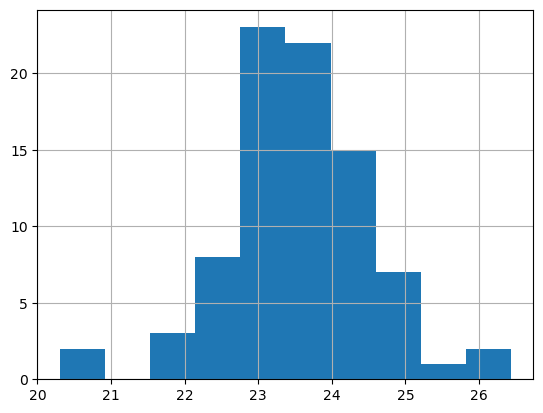

In [49]:
table['mean_time_deviation'].hist()

In [50]:
table['mean_time_deviation'].mean()

23.582863661524332

Среднее отклонение среднего времени ожидания по регионам от среднего времени ожидания по стране - 23,5 минуты. Распределение отклонений среднего времени ожидания по регионам от среднего времени ожидания по стране также напоминает нормальное распределение. Это значит, что среднее отклонение равно моде и равно медиане.

3. Построим столбчатую диаграмму. 

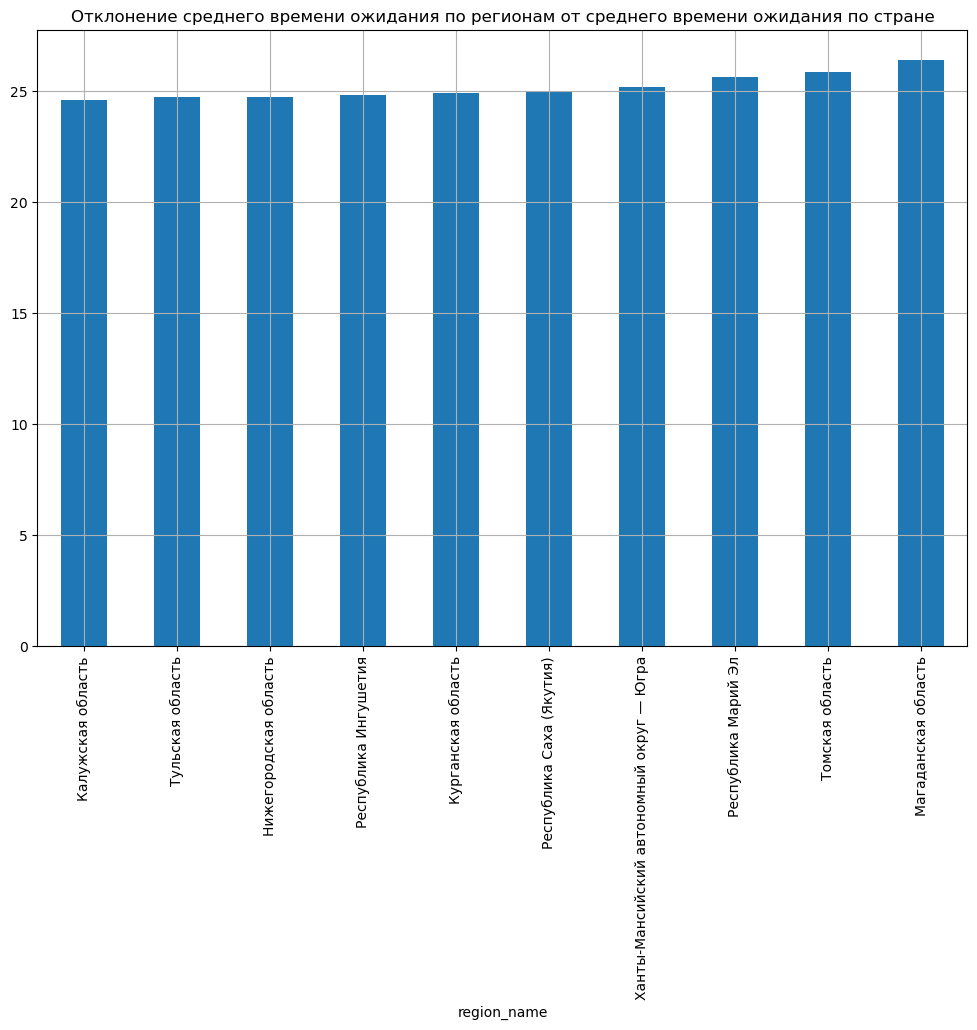

In [51]:
table.sort_values(by='mean_time_deviation', ascending=True).tail(10).plot(kind='bar',
           x='region_name',
           y='mean_time_deviation',
           figsize=(12,8),
           grid=True,                                                       
           title='Отклонение среднего времени ожидания по регионам от среднего времени ожидания по стране',
           legend=False)
plt.show()

<b>Вывод
<div class="alert alert-block alert-success">
    
1. Среднее (и самое часто встречающееся (так как нормальное распределение)) время ожидания ДПС - 120 минут. Есть как минимум 3 очень отдалённых от основной массы значений время ожидания ДПС. Они могут исказить результаты дальнейшего исследования и прогнозирования. Есть и другие значения, которые отклоняются от основной массы, но их отклонение гораздо меньше. Минимальное время ожидания 4.748831 минут, максимальное - 800.000000 минут. Получается слишком большой размах между максимальным и минимальным значениями (795.251169 минут).
2. Определили число выбросов по времени ожидания ДПС: 259. То есть в число выбросов вошли не только "экстремальные" значения. Был создан новый датасет без данных выбросов. Теперь минимальное время ожидания 38.858157 минут, максимальное - 201.878534 минут. Размах между максимальным и минимальным значениями теперь гораздо меньший (163.020377 минут).
3. Данные готовы для проведения статистического анализа и/или построения модели прогноза времени ожидания сотрудников ДПС.
4. Определили регионы с максимальным отклонением среднего времени ожидания от среднего времени ожидания по стране. В ТОП-10 вошли Магаданская область, Томская область, Республика Марий Эл, Ханты-Мансийский автономный округ - Югра, Республика Саха (Якутия), Курганская область, Республика Ингушетия, Нижегородская область, Тульская область и Калужская область. Среднее (и самое часто встречающееся (так как нормальное распределение)) отклонение среднего времени ожидания по регионам от среднего времени ожидания по стране - 23,5 минуты.

<b> 6. Исследование числа участников ДТП

<AxesSubplot:>

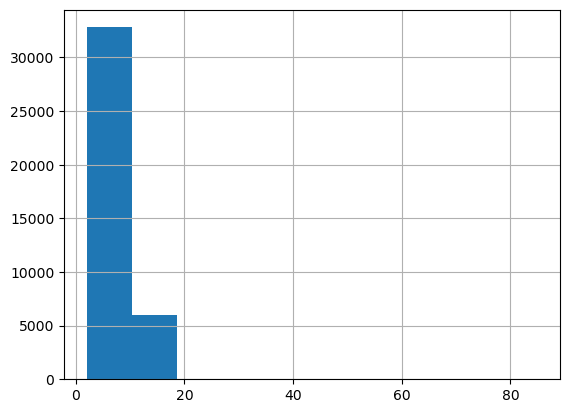

In [52]:
# построим гистограмму 'participants_amount'
good_data_wait_time['participants_amount'].hist()

Раз ось x выводится аж до 80, значит там тоже есть значения.

Добавим границы интервала с помощью параметра range=(min, max)

<AxesSubplot:>

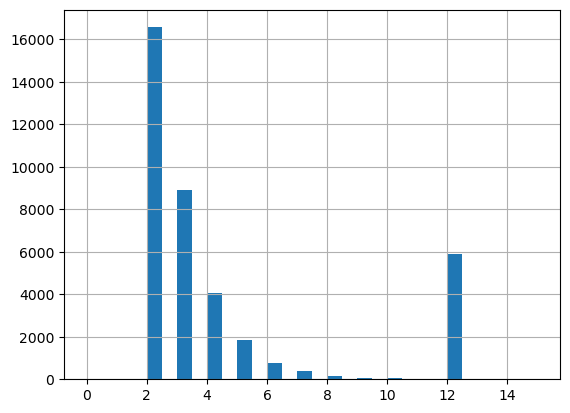

In [53]:
good_data_wait_time['participants_amount'].hist(bins=30, range=(0,15))

In [54]:
good_data_wait_time[good_data_wait_time['participants_amount'] == 0]['participants_amount'].count() # совершенно нет ДТП с 1 участником

0

Странно, что совершенно нет ДТП с 1 участником. В дальнейшем исследовании (см. ниже) мы выясним причину этого.<br>
При приближении стало видно, что чаще всего число участников ДТП - 2. Затем количество ДТП с всё бо́льшим числом участников постоянно уменьшается до числа участников, равных 11. При числе участников ДТП, равном 12, видно резкое возрастание количества ДТП. Предстоит выяснить, с чем связано такое резкое увеличение. Затем принять решение об удалении. Если это не ошибочные данные по количеству ДТП с 12 участниками, то эти данные должны быть сохранены.<br>
Стоит также отметить, что мода в данном случае - 2, однако она не равна среднему и медиане, так как распределение не нормальное.

Построим точечную диаграмму

<AxesSubplot:xlabel='region_name', ylabel='participants_amount'>

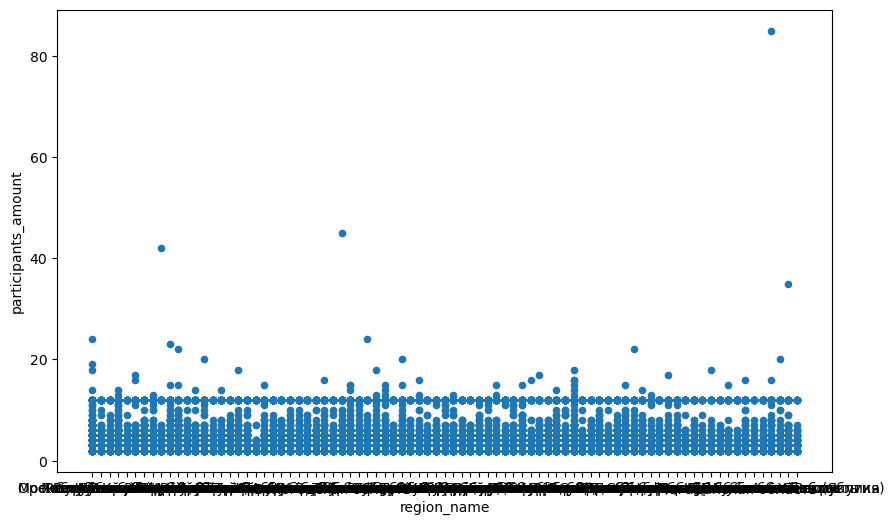

In [55]:
good_data_wait_time.plot(kind='scatter',
         x='region_name',
         y='participants_amount',
         figsize=(10,6))

Очевидно наличие "экстремальных" выбросов.

Постоим график boxplot

<AxesSubplot:>

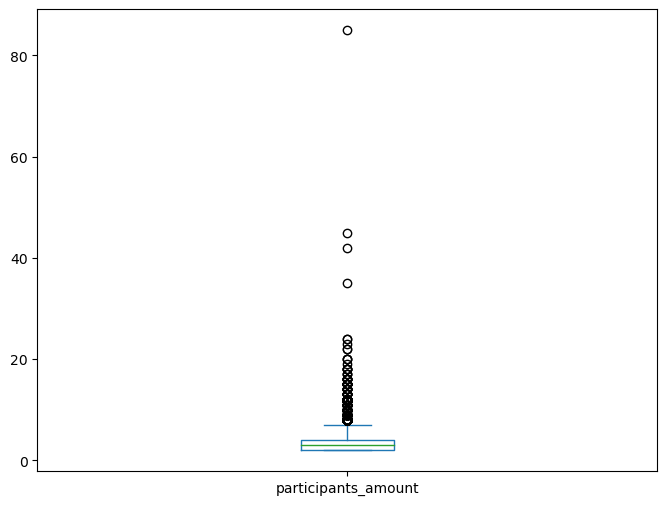

In [56]:
good_data_wait_time['participants_amount'].plot(kind='box', figsize=(8,6))

In [57]:
good_data_wait_time['participants_amount'].describe()

count    38826.000000
mean         4.314274
std          3.536578
min          2.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         85.000000
Name: participants_amount, dtype: float64

In [58]:
ejection('participants_amount')

(7.0, -1.0, 6359, 16.269668670845594)

1. Медиана = 3.000000
2. 25-й перцентиль = 2.000000
3. 75-й перцентиль = 4.000000 
4. IQR = 2.000000
5. Выбросы = 6359

На графике boxplot не видно нижнего уса. Значение на нижнем усе равно -1. Это получилось так из-за того, что Q1(=2) - 1,5IQR(=2) = -1. Связано это с тем, что коробка находится очень близко к 0 (так как в более чем 16000 ДТП число участников всего 2). Это хорошо видно на вышеприведённой гистограмме.

Найдем число записей при более высоком значение <code>percentile()</code>

Первым шагом определим границу значений, при percentile = 95. <br>
Запишем значение в переменную

In [59]:
participants_amount_ejection_h = np.percentile(good_data_wait_time['participants_amount'], 95)
participants_amount_ejection_h

12.0

Определим число выбросов

In [60]:
participants_amount_count = good_data_wait_time['participants_amount'][good_data_wait_time['participants_amount'] > participants_amount_ejection_h].count()
print('Число выбросов:', participants_amount_count)

Число выбросов: 59


Определим процент выбросов

In [61]:
participants_ejection = (participants_amount_count / len(good_data_wait_time)) * 100
participants_ejection

0.1519600267861742

Теперь надо определиться, почему так много ДТП с 12 участниками. Вероятно, произошёл некий сбой в данных. В начале "6. Исследование числа участников ДТП" мы выяснили, что в датасете абсолютно отсутствуют ДТП с ровно 1 участником. Возможно, эти значения с 1 участником по какой-то причине оказались записаны как ДТП с 12 участниками. В целом, это предположение звучит правдоподобно.

Посмотрим на типы ДТП с 12 участниками.

In [62]:
good_data_wait_time[good_data_wait_time['participants_amount']==12]['crash_type_name'].value_counts()

Опрокидывание                                                                                                                     2958
Наезд на препятствие                                                                                                              1490
Съезд с дороги                                                                                                                    1215
Наезд на животное                                                                                                                  153
Наезд на стоящее ТС                                                                                                                 45
Иной вид ДТП                                                                                                                        29
Столкновение                                                                                                                        17
Наезд на внезапно возникшее препятствие                

Большинство полученных типов ДТП с 12 участниками - такие, в которых участник (в большинстве случаев) может быть только 1. Следовательно, наше предположение выше - верное. Действительно, все ДТП с 1 участником оказались записаны в ДТП с 12 участниками.

А какие ДТП с 12 участниками являются действительно ДТП с 12 участниками? Очевидно, ДТП с типом "Столкновение", "Наезд на лицо, не являющееся участником дорожного движения(иного участника ДТП), осуществляющее какую-либо другую деятельность", также может быть "Наезд на животное", "Наезд на стоящее ТС" и "Иной вид ДТП".

Поэтому значения с ДТП с 12 участниками следует оставить, а в дальнейшем переопределить правильно число участников.

In [63]:
# убираем "экстремальные" выбросы
good_data_wait_time = good_data_wait_time[good_data_wait_time['participants_amount'] <= participants_amount_ejection_h] # здесь именно "меньше или равно", иначе не будут учтены в перезаписанном датасете значения, равные 12 (которых много)
good_data_wait_time = good_data_wait_time.reset_index(drop=True)
good_data_wait_time.head()

,reg_code,region_name,road_code,road_name,road_type,address,crash_type_name,crash_date,crash_time,crash_reason,fatalities_amount,victims_amount,vehicles_amount,participants_amount,datetime,crash_date_day,wait_time,time_deviation_sum
0,46,Московская область,отсутствует,мкр. Авиационный-Лямцино-ММК,Региональная или межмуниципальная дорога общег...,"ЦФО, Московская область, Городской округ Домод...",Опрокидывание,20181231,23:55:00,Другие нарушения ПДД водителями,1,0,1,12,2018-12-31 23:55:00,Понедельник,143.807252,23.427757
1,53,Оренбургская область,53К-2118000,Обход г. Оренбурга,Региональная или межмуниципальная дорога общег...,"ПФО, Оренбургская область, Оренбург",Наезд на препятствие,20181231,23:55:00,Другие нарушения ПДД водителями,1,0,1,2,2018-12-31 23:55:00,Понедельник,148.198679,27.819184
2,46,Московская область,А-107,"""Московское малое кольцо"" Икша - Ногинск - Бро...",Федеральная дорога общего пользования,"ЦФО, Московская область, Дмитровский район",Опрокидывание,20181231,23:40:00,Превышение установленной скорости движения,1,0,1,2,2018-12-31 23:40:00,Понедельник,71.441987,48.937508
3,8,Хабаровский край,А-375,"""Восток"" Хабаровск - Красный Яр - Ариадное - Ч...",Федеральная дорога общего пользования,"ДФО, Хабаровский край, Хабаровский район",Наезд на пешехода,20181231,23:20:00,Нахождение на проезжей части без цели её перех...,0,1,1,2,2018-12-31 23:20:00,Понедельник,143.569055,23.189560
4,35,Республика Крым,35Н-076,Симферополь - Севастополь - Бахчисарай,Региональная или межмуниципальная дорога общег...,"ЮФО, Республика Крым, Бахчисарайский район",Наезд на пешехода,20181231,23:00:00,Нарушение правил проезда пешеходного перехода,1,0,1,2,2018-12-31 23:00:00,Понедельник,120.542764,0.163269


In [64]:
# Проверка
print(len(data)-len(good_data_wait_time)) # всё верно: до этого было 259 выбросов от среднего времени ожидания и сейчас ещё 59. Итого: 259+59=318

318


Далее
- Для столбцов 'fatalities_amount','victims_amount','vehicles_amount' построить диаграммы размаха, определить экстремальные выбросы (параметр для np.percentile установить 99,9), установить число таких значений и процент от датасета. Можно вывести и другие данные, относящиеся к этим столбцам. Реализовать в цикле.
- Принять решение об удалении выбросов.

In [65]:
fatalities_victims_vehicles = ['fatalities_amount', 'victims_amount', 'vehicles_amount']

fatalities_amount


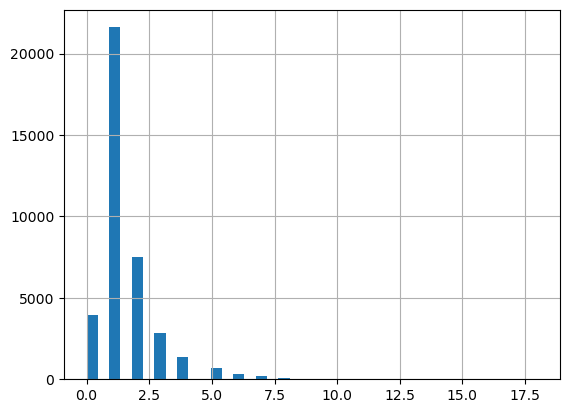

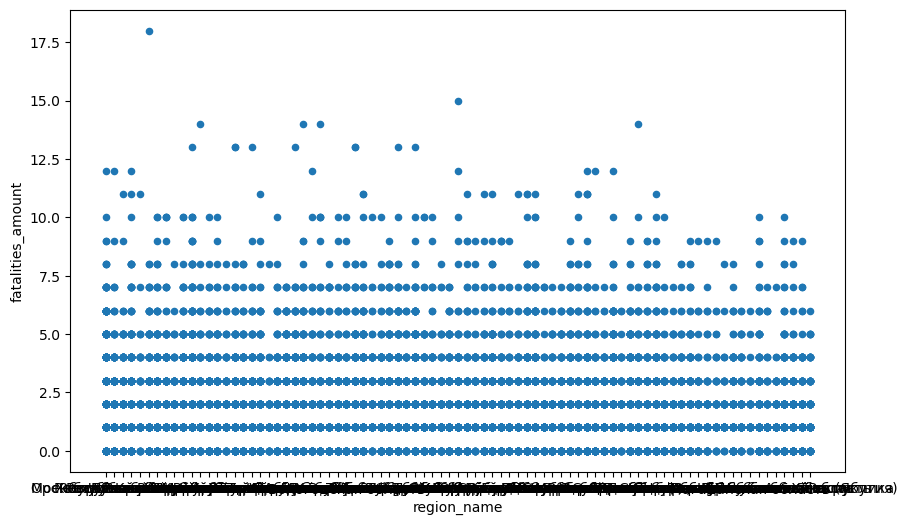

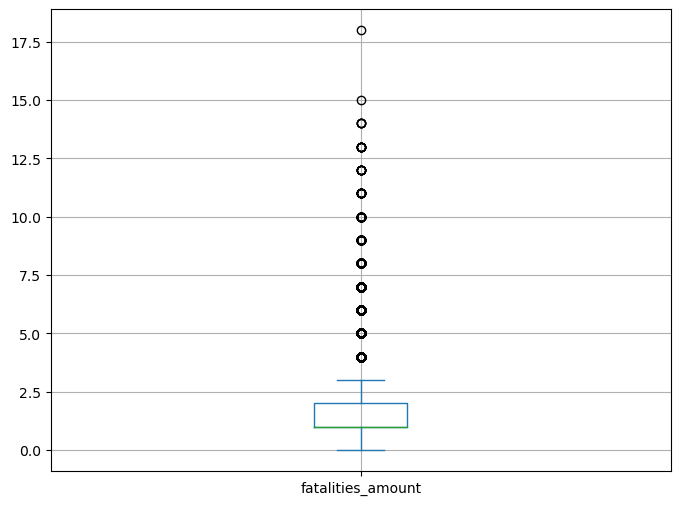

count    38767.000000
mean         1.537596
std          1.311325
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         18.000000
Name: fatalities_amount, dtype: float64

1) значение границы верхнего уса, значение границы нижнего уса, число выбросов (число значений выше значения границы верхнего уса), процент выбросов от общего числа значений: (3.5, -0.5, 2892, 7.399258027376231)
2) Значение перцентиля 99,9: 11.0
3) Новое число выбросов (число значений выше значения перцентиля 99,9): 23
4) Процент выбросов: 0.059328810586323416


victims_amount


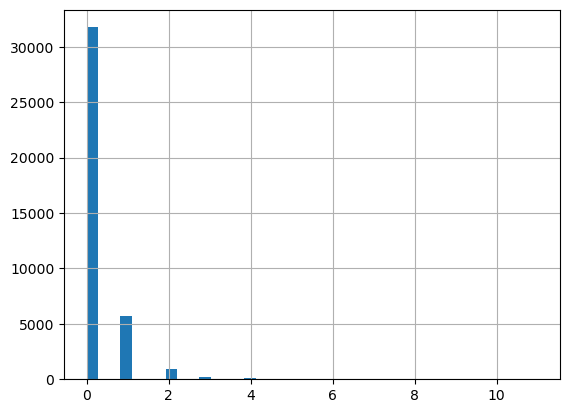

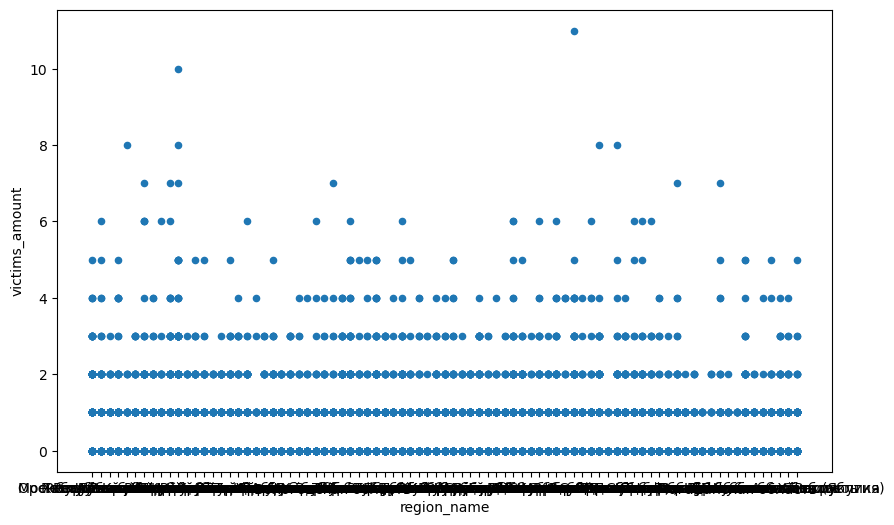

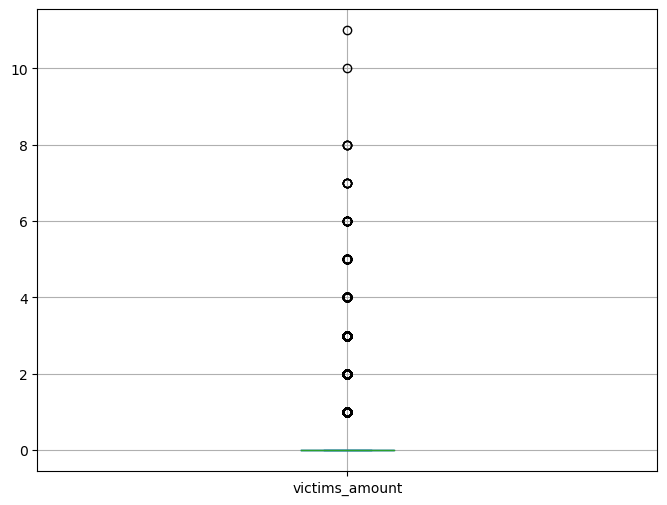

count    38767.000000
mean         0.230299
std          0.578776
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: victims_amount, dtype: float64

1) значение границы верхнего уса, значение границы нижнего уса, число выбросов (число значений выше значения границы верхнего уса), процент выбросов от общего числа значений: (0.0, 0.0, 7084, 18.124600230267365)
2) Значение перцентиля 99,9: 5.0
3) Новое число выбросов (число значений выше значения перцентиля 99,9): 30
4) Процент выбросов: 0.07738540511259577


vehicles_amount


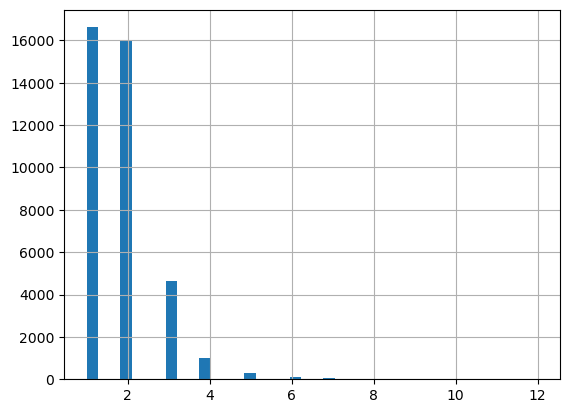

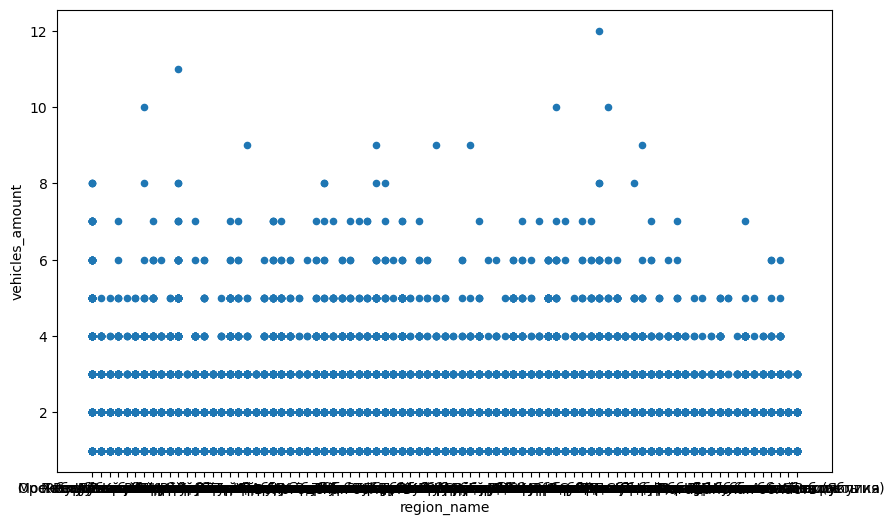

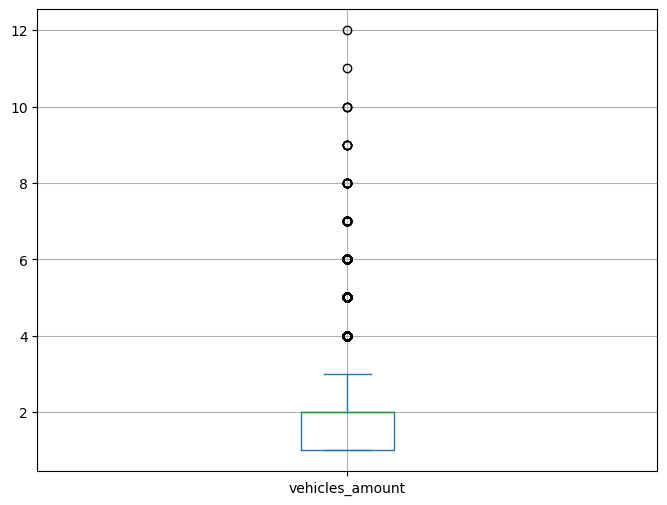

count    38767.000000
mean         1.787629
std          0.882870
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         12.000000
Name: vehicles_amount, dtype: float64

1) значение границы верхнего уса, значение границы нижнего уса, число выбросов (число значений выше значения границы верхнего уса), процент выбросов от общего числа значений: (3.5, -0.5, 1504, 3.8480235384418573)
2) Значение перцентиля 99,9: 7.0
3) Новое число выбросов (число значений выше значения перцентиля 99,9): 23
4) Процент выбросов: 0.059328810586323416




In [66]:
for element in fatalities_victims_vehicles:
    print(element)
    good_data_wait_time[element].hist(bins=40)
    plt.show()
    good_data_wait_time.plot(kind='scatter',
             x='region_name',
             y=element,
             figsize=(10,6))
    plt.show()
    good_data_wait_time[element].plot(kind='box', figsize=(8,6), grid=True)
    plt.show()
    print(good_data_wait_time[element].describe())
    print() # добавили пустую строку для более удобного визуального восприятия
    print('1) значение границы верхнего уса, значение границы нижнего уса, число выбросов (число значений выше значения границы верхнего уса), процент выбросов от общего числа значений:', ejection(element)) # это созданная выше функция
    ejection_h = np.percentile(good_data_wait_time[element], 99.9)
    print('2) Значение перцентиля 99,9:', ejection_h)
    count = good_data_wait_time[element][good_data_wait_time[element] > ejection_h].count()
    print('3) Новое число выбросов (число значений выше значения перцентиля 99,9):', count)
    percent_ejection = (count / len(good_data_wait_time)) * 100
    print('4) Процент выбросов:', percent_ejection)
    print('\n')

In [67]:
# убираем 'экстремальные' выбросы
for element in fatalities_victims_vehicles:
    ejection_h = np.percentile(good_data_wait_time[element], 99.9) # определяем значение перцентиля 99,9
    good_data_wait_time = good_data_wait_time[good_data_wait_time[element] <= ejection_h] # перезаписываем датасет без выбросов
    good_data_wait_time = good_data_wait_time.reset_index(drop=True)

In [68]:
# Проверка
print(len(data)-len(good_data_wait_time)) # всё верно 318 (до этого) + 23 + 30 + 23 = 394

394


По результатам, выведенным с помощью цикла, можно отметить следующее.

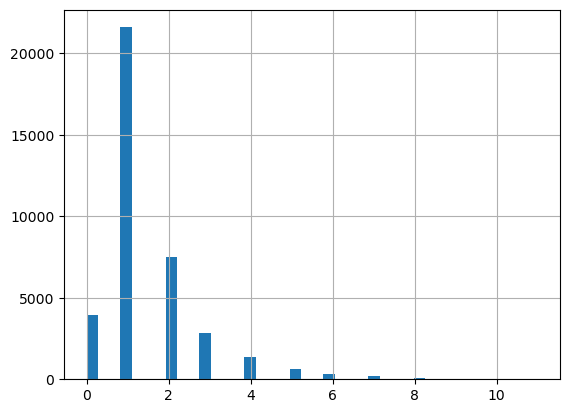

In [69]:
# Посмотрим ещё раз на гистограмму распределения числа погибших в ДТП
good_data_wait_time['fatalities_amount'].hist(bins=40)
plt.show()

In [70]:
good_data_wait_time['fatalities_amount'].value_counts()

1     21609
2      7506
0      3950
3      2850
4      1366
5       661
6       352
7       204
8        89
9        46
10       40
11       18
Name: fatalities_amount, dtype: int64

In [71]:
good_data_wait_time['fatalities_amount'].sum()-34000

25204

Мы видим, что лишь в 3950 ДТП нет погибших (это лишь 10% от всех случаев ДТП). Соответственно, в 90% случаев есть погибший(-ие). Похоже в данных присутствует ошибка. <br>
Посмотрим ещё чуть подробнее.

In [72]:
# Количество ДТП с числом погибших большим числа участников. Такой ситуации НЕ может быть. Тем не менее в датафрейме 973 подобных ДТП.
good_data_wait_time[good_data_wait_time['fatalities_amount'] > good_data_wait_time['participants_amount']]['region_name'].count()

973

In [73]:
# Количество ДТП с числом погибших большим числа жертв. Такой ситуации НЕ может быть. Тем не менее в датафрейме 33054 подобных ДТП.
# Но вообще это не точно. Здесь надо разбираться в понятиях "жертва" и "погибший". Может быть, погибший не считается жертвой.
# В Интернете, к сожалению, не удалось найти чётких определений всех понятий.
good_data_wait_time[good_data_wait_time['fatalities_amount'] > good_data_wait_time['victims_amount']]['region_name'].count()

33054

In [74]:
# Количество ДТП с числом жертв большим числа участников. Такой ситуации НЕ может быть. Тем не менее в датафрейме 8 подобных ДТП.
good_data_wait_time[good_data_wait_time['victims_amount'] > good_data_wait_time['participants_amount']]['region_name'].count()

8

Если посмотреть статистику по ДТП по годам в России (например, здесь: https://rusdtp.ru/stat-dtp/), то за все последние года процент погибших (обращаем внимание, что "погибших", а не "числа ДТП с погибшим(-и)", в одном ДТП может быть несколько погибших) составляет 8-12% от всех случаев ДТП.<br>
Если во всех случаях ДТП, которые мы нашли только что выше (Количество ДТП с числом погибших большим числа участников, с числом погибших большим числа жертв и с числом жертв большим числа участников), заменить число погибших на 0, то получим, что теперь в 90% случаев погибших нет, а в 10 % - есть. Однако, нет никакой гарантии, что в данных случаях ДТП ровно 0 погибших. Также, как уже было отмечено в комментарии к коду, надо чётко разьираться в определениях "участник", "жертва", "пострадавший". Иначе нет уверенности в том, что в данных авариях действительно должно быть 0 погибших. Может быть, это вообще 2 невзаимосвязанных проблемы, решение которых должно быть независимым друг от друга.<br>
Итого: данная проблема (слишком большое кол-во ДТП с погибшим(-и) и некорректное соотношение кол-ва участников, жертв и пострадавших) требует отдельного, более детального и глубокого анализа, чтобы сделать обоснованные выводы и принять решение о возможном исправлении данных.

Интересно также отметить то, что в 43% (16613 ДТП) случаев ДТП было лишь одно транспортное средство. В 41% случаев (15984 ДТП) было 2 транспортных средства.

In [75]:
# За одно проверим правильность данных
good_data_wait_time[good_data_wait_time['vehicles_amount'] == 1]['crash_type_name'].value_counts()

Опрокидывание                                                                                                                     6089
Наезд на пешехода                                                                                                                 4325
Наезд на препятствие                                                                                                              2805
Съезд с дороги                                                                                                                    2614
Наезд на животное                                                                                                                  444
Падение пассажира                                                                                                                  184
Иной вид ДТП                                                                                                                        79
Наезд на лицо, не являющееся участником дорожного движе

 Получаем, что действительно все ДТП с одним транспортным средством соответствуют типам ДТП, в котором, как правило, участвует лишь одно транспортное средство.

<b>Вывод
<div class="alert alert-block alert-success">
    
1. При анализе числа участников ДТП обнаружилось, что совершенно нет ДТП с только 1 участником.
Чаще всего число участников ДТП - 2. Затем количество ДТП с всё бо́льшим числом участников постоянно уменьшается до числа участников, равных 11. При числе участников ДТП, равном 12, видно резкое возрастание количества ДТП.<br>
    Почему так много ДТП с 12 участниками, и при этом вообще нет ДТП с 1 участником? Вероятно, произошёл некий сбой в данных. Мы предположили, что эти значения с 1 участником по какой-то причине оказались записаны как ДТП с 12 участниками.<br>
    Мы посмотрели на типы ДТП с 12 участниками. Большинство полученных типов ДТП такие, в которых участник (в большинстве случаев) может быть только 1. Следовательно, наше предположение выше - верное. Действительно, все ДТП с 1 участником оказались записаны в ДТП с 12 участниками.<br>
А какие ДТП с 12 участниками являются действительно ДТП с 12 участниками? Очевидно, ДТП с типом "Столкновение", "Наезд на лицо, не являющееся участником дорожного движения(иного участника ДТП), осуществляющее какую-либо другую деятельность", также может быть (но это надо уточнять) "Наезд на животное", "Наезд на стоящее ТС" и "Иной вид ДТП".<br>
Поэтому  мы решили, что значения с ДТП с 12 участниками следует оставить, а в дальнейшем переопределить правильно число участников.<br>
    
2. Определили число выбросов по столбцу числа участников: 59 (параметр для np.percentile установили 95)<br>
3. Для столбцов 'fatalities_amount','victims_amount','vehicles_amount' построили с помощью цикла диаграммы размаха, определили экстремальные выбросы (параметр для np.percentile установили 99,9), установили число таких значений и процент от датасета. Вывели на экран и другие данные, относящиеся к этим столбцам (в том числе и столбчатую диаграмму). Удалили выбросы (23 среди погибших, 30 среди жертв и 23 среди транспортных средств).<br>
4. По гистограмме распределения числа погибших в ДТП мы увидели, что лишь в 3950 ДТП нет погибших (это лишь 10% от всех случаев ДТП). Соответственно, в 90% случаев есть погибший(-ие). Похоже в данных присутствует ошибка.<br>
Также вызвали вопрос корректность данных: ДТП с числом погибших большим числа участников, ДТП с числом погибших большим числа жертв, ДТП с числом жертв большим числа участников, возможность существования таких ситуаций была подвергнута сомнению (тем не менее такие ситуации оказались в датафрейме).<br>
Была установлено, что данная проблема (слишком большое кол-во ДТП с погибшим(-и) и некорректное соотношение кол-ва участников, жертв и пострадавших) требует отдельного, более детального и глубокого анализа, чтобы сделать обоснованные выводы и принять решение о возможном исправлении данных.<br>
Интересно также отметить то, что в 43% (16613 ДТП) случаев ДТП было лишь одно транспортное средство. В 41% случаев (15984 ДТП) было 2 транспортных средства.

<b>7. Исследовать ДТП в ночное время суток.

In [76]:
# Переименуем всё-таки наш датафрем без выбросов
data = good_data_wait_time

1. Определим число  наездов на пешехода в московской области.	
2. Какой процент ДТП, составляют ДТП, произошедшие в ночное время суток (от 0 до 5 часов  включительно). Построим гистограмму числа ДТП по часам 
3. Построим гистограмму числа ДТП со смертельным исходом для столкновений по часам.
4. Используя срезы данных, сравним число ДТП со смертельным исходом в будни (кроме пятницы), отдельно в пятницу и в выходные 
дни.


In [77]:
#1
walker_dtp = data.query('region_name == "Московская область" & crash_type_name == "Наезд на пешехода"')['region_name'].count()
print('Число наездов на пешехода в московской области:', walker_dtp)

Число наездов на пешехода в московской области: 534


In [78]:
#2
dtp_night = data[(data['datetime'].dt.hour == 0) | (data['datetime'].dt.hour == 1) | (data['datetime'].dt.hour == 2) | (data['datetime'].dt.hour == 3) | (data['datetime'].dt.hour == 4) | (data['datetime'].dt.hour == 5)]['region_name'].count() / len(data) * 100
print('Процент ДТП, произошедших в ночное время суток (от 0 до 5 часов включительно):', dtp_night)

Процент ДТП, произошедших в ночное время суток (от 0 до 5 часов включительно): 12.263833966555529


In [79]:
# Выводим на экран ДТП, произошедшие в ночное время суток (от 0 до 5 часов включительно)
# Через data.query('"0:00:00" <= crash_time < "6:00:00"') работает неправильно почему-то. Добавляется другое время, а времени с 0 до 2 часов нет.
# Вот так работает
data[(data['datetime'].dt.hour == 0) | (data['datetime'].dt.hour == 1) | (data['datetime'].dt.hour == 2) | (data['datetime'].dt.hour == 3) | (data['datetime'].dt.hour == 4) | (data['datetime'].dt.hour == 5)]

,reg_code,region_name,road_code,road_name,road_type,address,crash_type_name,crash_date,crash_time,crash_reason,fatalities_amount,victims_amount,vehicles_amount,participants_amount,datetime,crash_date_day,wait_time,time_deviation_sum
122,75,Челябинская область,М-5,"""Урал"" Москва - Рязань - Пенза - Самара - Уфа ...",Федеральная дорога общего пользования,"УФО, Челябинская область, Златоуст",Съезд с дороги,20181231,5:45:00,Несоответствие скорости конкретным условиям дв...,2,0,1,2,2018-12-31 05:45:00,Понедельник,108.441732,11.937763
123,3,Краснодарский край,М-4,"""Дон"" Москва - Воронеж - Ростов-на-Дону - Крас...",Федеральная дорога общего пользования,"ЮФО, Краснодарский край, Кущевский район",Наезд на препятствие,20181231,5:10:00,Нарушение правил расположения ТС на проезжей ч...,3,0,1,3,2018-12-31 05:10:00,Понедельник,132.006967,11.627472
124,11,Архангельская область,М-8,"""Холмогоры"" Москва - Ярославль - Вологда – Арх...",Федеральная дорога общего пользования,"СЗФО, Архангельская область, Вельский район",Столкновение,20181231,5:00:00,"Нарушение правил обгона, Выезд на полосу встре...",1,1,2,2,2018-12-31 05:00:00,Понедельник,155.272683,34.893188
125,82,Республика Дагестан,Р-215,Астрахань - Кочубей - Кизляр - Махачкала,Федеральная дорога общего пользования,"СКФО, Республика Дагестан, Бабаюртовский район",Столкновение,20181231,4:20:00,Выезд на полосу встречного движения,1,0,2,2,2018-12-31 04:20:00,Понедельник,138.381866,18.002371
126,25,Иркутская область,А-331,"""Вилюй"" Тулун - Братск - Усть-Кут - Мирный - Я...",Федеральная дорога общего пользования,"СФО, Иркутская область, Братский район",Опрокидывание,20181231,3:30:00,Несоответствие скорости конкретным условиям дв...,5,2,1,4,2018-12-31 03:30:00,Понедельник,101.515577,18.863918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38686,94,Удмуртская Республика,М-7,Подъезд к городу Пермь от а/д М-7,Федеральная дорога общего пользования,"ПФО, Удмуртская Республика, Малопургинский район",Наезд на пешехода,20180401,2:00:00,Ходьба вдоль проезжей части попутного направле...,0,1,2,2,2018-04-01 02:00:00,Воскресенье,128.872621,8.493126
38687,80,Республика Башкортостан,80Н-069,Аскарово - Альмухаметово - Сибай,Региональная или межмуниципальная дорога общег...,"ПФО, Республика Башкортостан, Абзелиловский ра...",Наезд на животное,20180401,1:55:00,Нарушение правил расположения ТС на проезжей ч...,2,0,1,4,2018-04-01 01:55:00,Воскресенье,140.300263,19.920768
38688,3,Краснодарский край,Р-217,Подъезд к городу Майкоп от а/д Р-217,Федеральная дорога общего пользования,"ЮФО, Краснодарский край, Новокубанский район",Столкновение,20180401,1:00:00,"Выезд на полосу встречного движения в местах, ...",2,0,2,3,2018-04-01 01:00:00,Воскресенье,106.835201,13.544294
38689,76,Забайкальский край,А-350,Чита - Забайкальск - граница с Китайской Народ...,Федеральная дорога общего пользования,"СФО, Забайкальский край, Читинский район, Ново...",Опрокидывание,20180401,0:30:00,Нарушение правил расположения ТС на проезжей ч...,3,1,1,4,2018-04-01 00:30:00,Воскресенье,110.265314,10.114181


<AxesSubplot:>

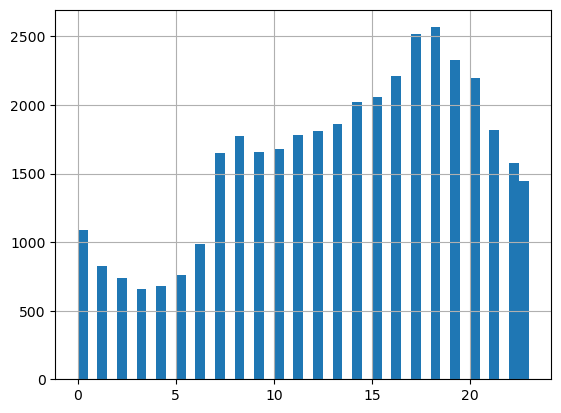

In [80]:
# Гистограмма числа ДТП по часам.
data['datetime'].dt.hour.hist(bins=46)

Из данной гистограммы видно, что чаще всего ДТП происходит около 6 часов вечера. В это время люди заканчивают рабочий день и едут домой. На улицах много машин, час-пик (особенно в больших городах). Поэтому возрастает число ДТП. Также из-за утомления после рабочего дня у людей может снижатся внимательность и сконцентрированность на дороге, что также может привести к ДТП.

<AxesSubplot:>

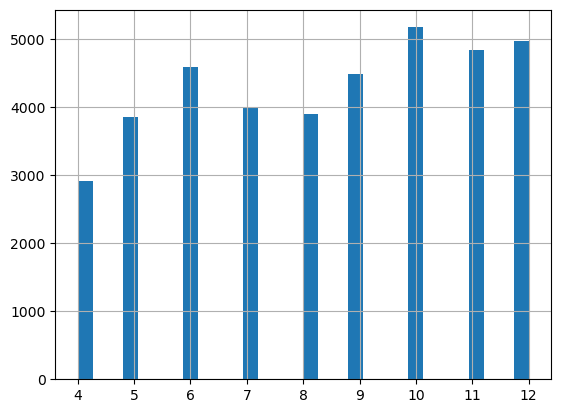

In [81]:
data['datetime'].dt.month.hist(bins=30) # Посмотрим за одно и по месяцам. Почему-то совершенно нет ДТП в 1 - 3 месяце (январт - март)

In [82]:
data['datetime'].dt.month.unique()

array([12, 11, 10,  9,  8,  7,  6,  5,  4], dtype=int64)

Оказывается в датасете нет данных за первый квартал года (январь - март)

<AxesSubplot:>

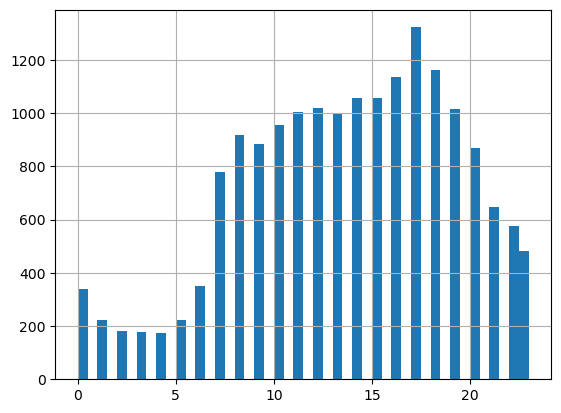

In [83]:
#3 Гистограмма числа ДТП со смертельным исходом для столкновений по часам.
data[(data['fatalities_amount'] != 0) & (data['crash_type_name'] == 'Столкновение')]['datetime'].dt.hour.hist(bins=46)

Гистограмма числа ДТП со смертельным исходом для столкновений по часам внешне очень похожа на просто гистограмму числа ДТП по часам. Тем не менее исходя из этой гистограммы чаще всего ДТП со смертельным исходом в результате столкновения происходит около 5 часов вечера.

In [84]:
#4
print('Число ДТП со смертельным исходом в будни (кроме пятницы):', data.query('fatalities_amount != 0 & ~crash_date_day.isin(["Пятница", "Суббота", "Воскресенье"])')['region_name'].count())
print('Число ДТП со смертельным исходом в пятницу:', data.query('fatalities_amount != 0 & crash_date_day.isin(["Пятница"])')['region_name'].count())
print('Число ДТП со смертельным исходом в выходные дни:', data.query('fatalities_amount != 0 & crash_date_day.isin(["Суббота", "Воскресенье"])')['region_name'].count())

Число ДТП со смертельным исходом в будни (кроме пятницы): 17818
Число ДТП со смертельным исходом в пятницу: 5224
Число ДТП со смертельным исходом в выходные дни: 11699


<b>Вывод
<div class="alert alert-block alert-success">
    
1. Число наездов на пешехода в московской области: 534. <br>
2. 12% ДТП произошло в ночное время суток (от 0 до 5 часов включительно).<br>
3. Из гистограммы числа ДТП по часам мы увидели, что чаще всего ДТП происходит около 6 часов вечера. В это время люди заканчивают рабочий день и едут домой. На улицах много машин, час-пик (особенно в больших городах). Поэтому возрастает число ДТП. Также из-за утомления после рабочего дня у людей может снижатся внимательность и сконцентрированность на дороге, что также может привести к ДТП.<br>
4. Оказывается в датасете нет данных за первый квартал года (январь - март).<br>
5. Гистограмма числа ДТП со смертельным исходом для столкновений по часам оказалась внешне очень похожа на просто гистограмму числа ДТП по часам. Тем не менее исходя из этой гистограммы чаще всего ДТП со смертельным исходом в результате столкновения происходит около 5 часов вечера.<br>
6. Число ДТП со смертельным исходом в будни (кроме пятницы): 17818<br>
Число ДТП со смертельным исходом в пятницу: 5224<br>
Число ДТП со смертельным исходом в выходные дни: 11699<br>

<b>8. Определить наиболее опасные дороги.

1. Определим самую опасную дорогу в России (по числу погибших) (road_code) отдельно для двух разных типов дорог. (федеральной и региональной)
2. Определим дорогу, которая пересекает наибольшее число регионов. Надо не забыть исключить отсутствующий тип дороги.
3. Определим регион с самым опасным участком дороги. Для найденной дороги, построим столбчатую диаграмму по числу ДТП.

In [85]:
#1 ТОП самых опасных федеральных дорог
sum_dtp_on_road = data[data['road_type'] == 'Федеральная дорога общего пользования'].pivot_table(index='road_code',
               aggfunc='sum',
               values='fatalities_amount')
sum_dtp_on_road = sum_dtp_on_road.sort_values(by='fatalities_amount', ascending=False)
sum_dtp_on_road.head(10)

,fatalities_amount
road_code,
М-7,1899
М-5,1849
М-4,1604
Р-217,1518
Р-255,905
Р-22,807
М-2,755
М-8,730
М-10,661


In [86]:
#1 ТОП самых опасных региональных дорог
sum_dtp_on_road = data[data['road_type'] == 'Региональная или межмуниципальная дорога общего пользования'].pivot_table(index='road_code',
               aggfunc='sum',
               values='fatalities_amount')
sum_dtp_on_road = sum_dtp_on_road.sort_values(by='fatalities_amount', ascending=False)
sum_dtp_on_road.head(10)

,fatalities_amount
road_code,
отсутствует,27190
35А-002,216
03К-002,166
35А-001,159
87Р-001,152
22Р-0159,128
35К-003,120
08А-1,110
53К-2101000,101


Самая опасная (по числу погибших) федеральная дорога (1899 погибших) - М-7, самая опасная (по числу погибших) региональная дорога (27 погибших) -35А-002.

In [87]:
#2 Определим дорогу, которая пересекает наибольшее число регионов.
roads = []
roads_in_regions = []
for element in data['road_code'].unique(): # для каждой дороги
    # в первый список добавляем название дороги:
    roads.append(element)
    # во второй список добавляем чило регионов, пересекаемых данной дорогой:
    roads_in_regions.append(data[(data['road_code'] == element) & (data['road_code'] != 'отсутствует')].drop_duplicates(subset=['region_name'])['region_name'].count())

In [88]:
#Создаём датафрейм из только что полученных списков: столбец 'road_code' - названия дорог, столбец 'regions_amount' - число регионов, пересекаемых каждой дорогой
amount_of_regions = pd.DataFrame(
    {'road_code': roads,
     'regions_amount': roads_in_regions
    })

In [89]:
# Сортируем в порядке убывания
amount_of_regions = amount_of_regions.sort_values(by='regions_amount', ascending=False)
amount_of_regions.head(10)

,road_code,regions_amount
38,М-5,11
5,Р-217,9
6,М-7,9
15,Р-22,9
9,М-4,7
27,М-8,6
32,М-2,6
26,М-10,5
43,Р-254,5
86,М-3,5


In [90]:
print('Дорога, которая пересекает наибольшее число регионов -', amount_of_regions.iloc[0, 0]) # здесь именно iloc использовать надо, так как индексы в датафрейме сбиты

Дорога, которая пересекает наибольшее число регионов - М-5


In [91]:
#3 Регион с самым опасным участком дороги

In [92]:
# Создаём срез датафрейма по двум столбцам: 'region_name', 'road_code'
regions_with_roads = data[['region_name', 'road_code']]

In [93]:
regions_with_roads = regions_with_roads[regions_with_roads['road_code'] != 'отсутствует'] # убираем строки без названия дороги

In [94]:
regions_with_roads.groupby(['region_name', 'road_code'], as_index=False).size().sort_values(by='size', ascending=False)
# Метод size считает число одинаковых строк (то есть строк с одинаковыми значениями как в 'region_name', так и в 'road_code')

,region_name,road_code,size
80,Владимирская область,М-7,377
674,Республика Дагестан,Р-217,293
212,Краснодарский край,М-4,279
536,Приморский край,А-370,268
1152,Ставропольский край,Р-217,231
...,...,...,...
34,Архангельская область,11К-533,1
33,Архангельская область,11К-501,1
32,Архангельская область,11К-461,1
163,Калининградская область,27К-176,1


Значит, регион с самым опасным участком дороги (то есть участком дороги с наибольшим количеством случаев ДТП) является Владимирская область (опасный участок дороги М-7, на этом участке на данной дороге произошло 380 ДТП)

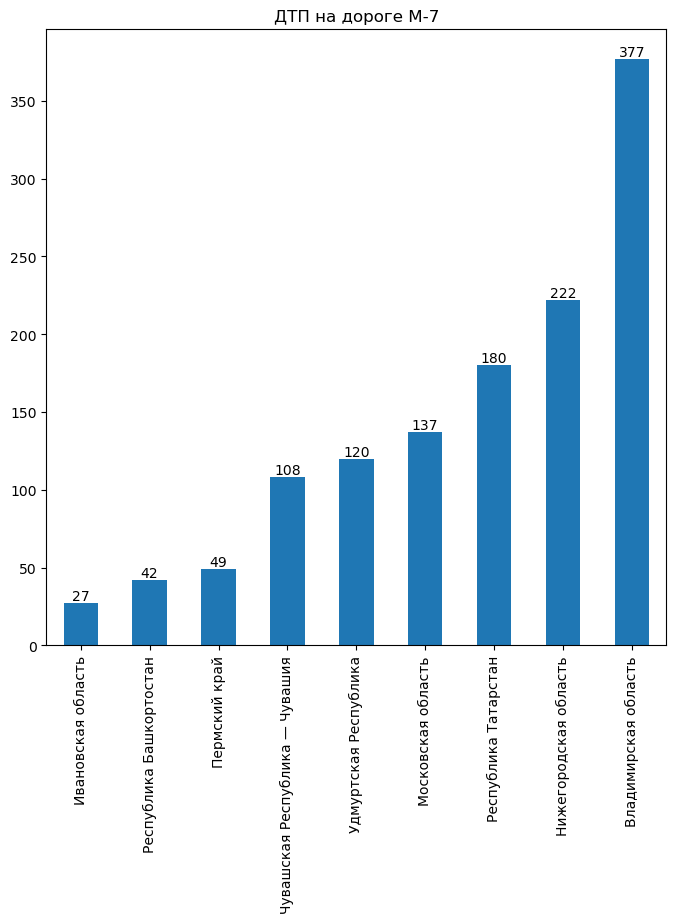

In [95]:
# Для найденной дороги, построим столбчатую диаграмму по числу ДТП
dtp_count_m_7 = data[data['road_code'] == 'М-7']['region_name'].value_counts().sort_values(ascending=True)
dtp_count_m_7
ax = dtp_count_m_7.plot(kind='bar',
                        figsize=(8,8),
                        title='ДТП на дороге М-7',
                        legend=False
                       )
ax.bar_label(ax.containers[0])
plt.show()

Далее

1. Для топ-10 дорог пересекающих разные регионы определим суммарное число погибших, участников ДТП (participants_amount).
2. Построим столбчатую диаграмму числа ДТП  для определенных в п.1 дорог по регионам. (визуализируем только топ-10 регионов по числу ДТП)
3. Для каждой дороги из п.1 постоим столбчатую диаграмму распределения числа ДТП по регионам. Реализуем в цикле.

In [96]:
#1
top_10_roads = amount_of_regions.head(10)['road_code'].tolist()
top_10_roads

['М-5', 'Р-217', 'М-7', 'Р-22', 'М-4', 'М-8', 'М-2', 'М-10', 'Р-254', 'М-3']

In [97]:
#1 Для топ-10 дорог пересекающих разные регионы
print('Суммарное число погибших:', data.query('road_code in @top_10_roads')['fatalities_amount'].sum())

Суммарное число погибших: 10699


In [98]:
#1 Для топ-10 дорог пересекающих разные регионы
print('Суммарное число участников:', data.query('road_code in @top_10_roads')['participants_amount'].sum())

Суммарное число участников: 26903


In [99]:
#2
data.query('road_code in @top_10_roads') # Определили ДТП на ТОП-10 дорогах, пересекающих разные регионы
#data[data['road_code'].isin(top_10_roads)] либо так, либо так

,reg_code,region_name,road_code,road_name,road_type,address,crash_type_name,crash_date,crash_time,crash_reason,fatalities_amount,victims_amount,vehicles_amount,participants_amount,datetime,crash_date_day,wait_time,time_deviation_sum
5,26,Республика Ингушетия,Р-217,"""Кавказ"" автомобильная дорога М-4 ""Дон"" - Влад...",Федеральная дорога общего пользования,"СКФО, Республика Ингушетия, Назрановский",Столкновение,20181231,21:50:00,Выезд на полосу встречного движения,1,0,5,5,2018-12-31 21:50:00,Понедельник,131.018778,10.639283
7,80,Республика Башкортостан,М-7,"""Волга"" Москва - Владимир - Нижний Новгород - ...",Федеральная дорога общего пользования,"ПФО, Республика Башкортостан, Кушнаренковский ...",Столкновение,20181231,21:40:00,Нарушение правил обгона,2,0,2,3,2018-12-31 21:40:00,Понедельник,157.740938,37.361443
11,79,Республика Адыгея,М-4,"""Дон"" Москва - Воронеж - Ростов-на-Дону - Крас...",Федеральная дорога общего пользования,"ЮФО, Республика Адыгея, Теучежский район",Опрокидывание,20181231,21:00:00,Несоответствие скорости конкретным условиям дв...,1,0,1,12,2018-12-31 21:00:00,Понедельник,157.929067,37.549572
26,17,Владимирская область,М-7,"""Волга"" Москва - Владимир - Нижний Новгород - ...",Федеральная дорога общего пользования,"ЦФО, Владимирская область, Камешковский район",Наезд на препятствие,20181231,19:25:00,Другие нарушения ПДД водителями,1,0,1,12,2018-12-31 19:25:00,Понедельник,108.084983,12.294512
28,3,Краснодарский край,М-4,"""Дон"" Москва - Воронеж - Ростов-на-Дону - Крас...",Федеральная дорога общего пользования,"ЮФО, Краснодарский край, Выселковский район",Наезд на пешехода,20181231,19:00:00,Ходьба вдоль проезжей части попутного направле...,1,0,2,2,2018-12-31 19:00:00,Понедельник,123.391096,3.011601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38678,61,Рязанская область,Р-22,"«Каспий» автомобильная дорога М-4 ""Дон"" - Тамб...",Федеральная дорога общего пользования,"ЦФО, Рязанская область, Михайловский район",Столкновение,20180401,4:00:00,"Выезд на полосу встречного движения в местах, ...",1,1,4,4,2018-04-01 04:00:00,Воскресенье,84.547987,35.831508
38683,56,Пензенская область,М-5,"""Урал"" Москва - Рязань - Пенза - Самара - Уфа ...",Федеральная дорога общего пользования,"ПФО, Пензенская область, Кузнецкий район, Евла...",Столкновение,20180401,3:10:00,Выезд на полосу встречного движения,1,0,3,2,2018-04-01 03:10:00,Воскресенье,129.387009,9.007513
38684,18,Волгоградская область,Р-22,"«Каспий» автомобильная дорога М-4 ""Дон"" - Тамб...",Федеральная дорога общего пользования,"ЮФО, Волгоградская область, Иловлинский район",Наезд на пешехода,20180401,3:00:00,Переход через проезжую часть вне пешеходного п...,0,1,1,2,2018-04-01 03:00:00,Воскресенье,118.745443,1.634052
38686,94,Удмуртская Республика,М-7,Подъезд к городу Пермь от а/д М-7,Федеральная дорога общего пользования,"ПФО, Удмуртская Республика, Малопургинский район",Наезд на пешехода,20180401,2:00:00,Ходьба вдоль проезжей части попутного направле...,0,1,2,2,2018-04-01 02:00:00,Воскресенье,128.872621,8.493126


In [100]:
regions_of_ten_roads = data[data['road_code'].isin(top_10_roads)]['region_name'].value_counts().sort_values(ascending=True)
regions_of_ten_roads # Число ДТП по регионам для топ-10 дорог, пересекающих разные регионы

Костромская область                      4
Свердловская область                    19
Ивановская область                      27
Брянская область                        28
Чеченская Республика                    28
Республика Ингушетия                    35
Республика Адыгея                       37
Карачаево-Черкесская Республика         37
Вологодская область                     46
Тюменская область                       47
Саратовская область                     48
Белгородская область                    48
Республика Калмыкия                     48
Пермский край                           49
Омская область                          51
Ульяновская область                     55
Республика Северная Осетия — Алания     65
Орловская область                       75
Волгоградская область                   79
Новосибирская область                   81
Республика Мордовия                     86
Оренбургская область                    86
Астраханская область                    86
Курская обл

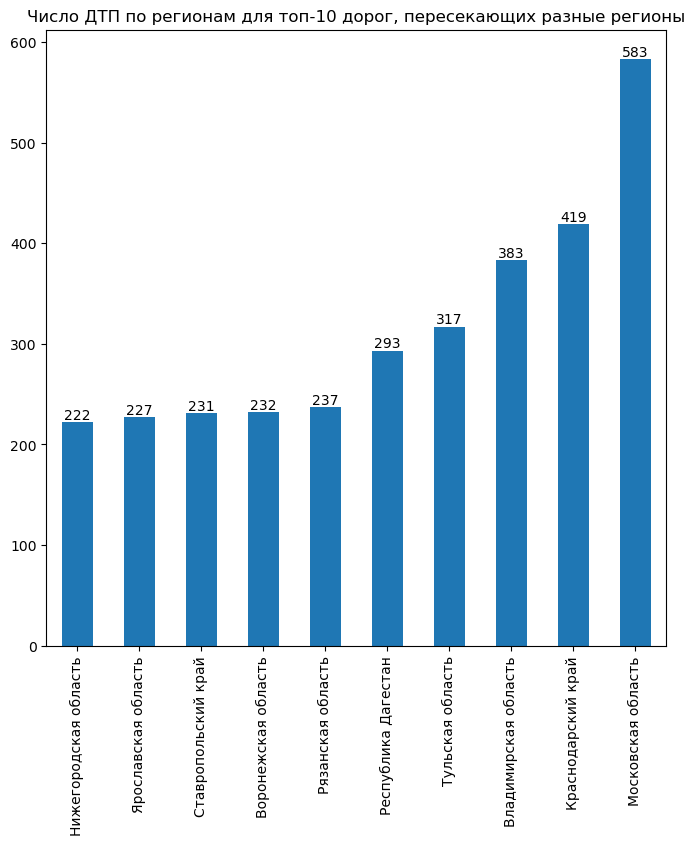

In [101]:
#2
ax = regions_of_ten_roads.tail(10).plot(kind='bar',
                        figsize=(8,8),
                        title='Число ДТП по регионам для топ-10 дорог, пересекающих разные регионы',
                        legend=False
                         )
ax.bar_label(ax.containers[0])
plt.show()

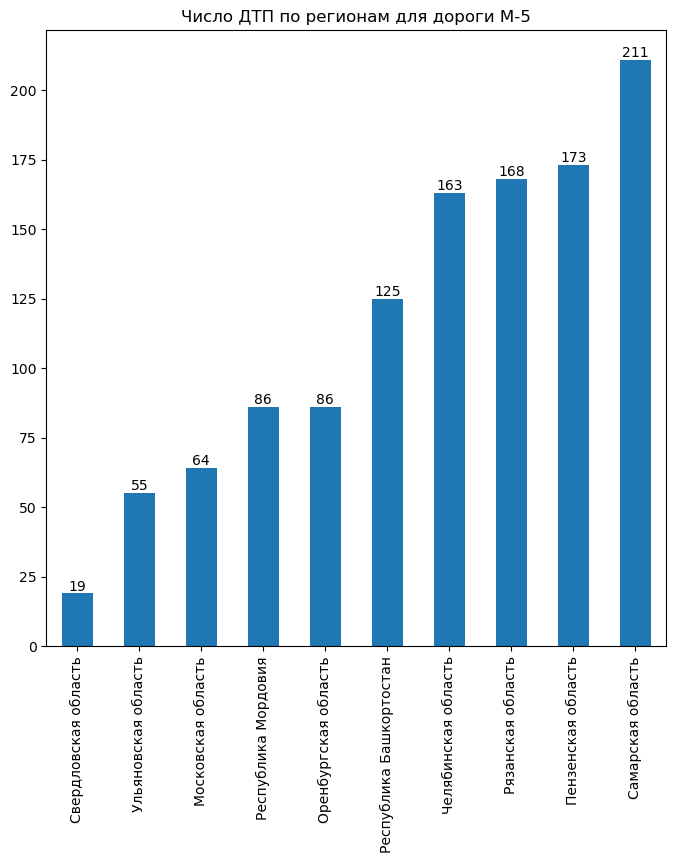

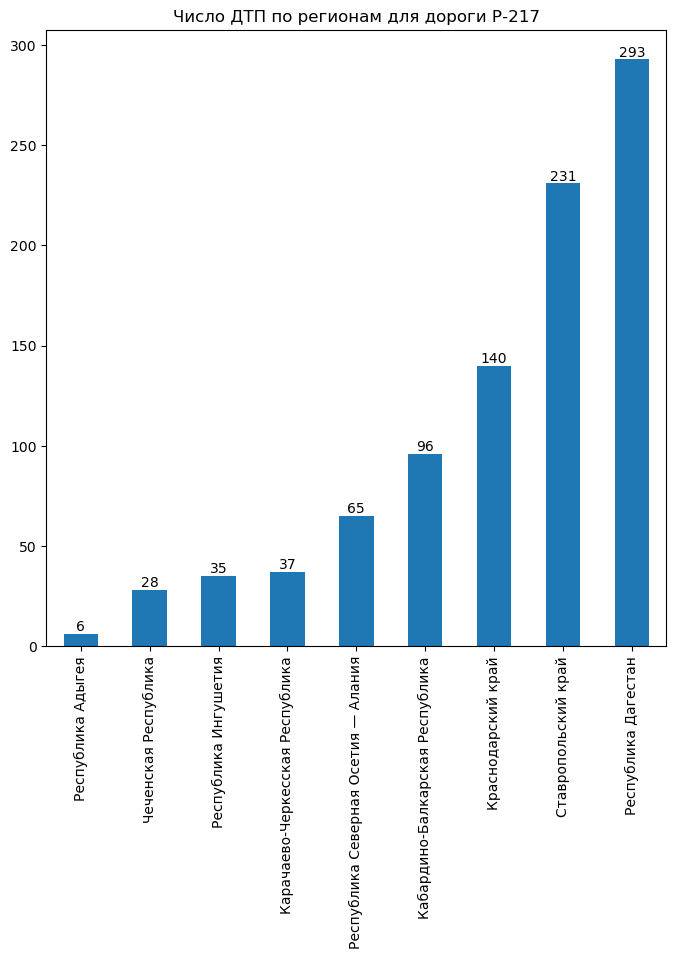

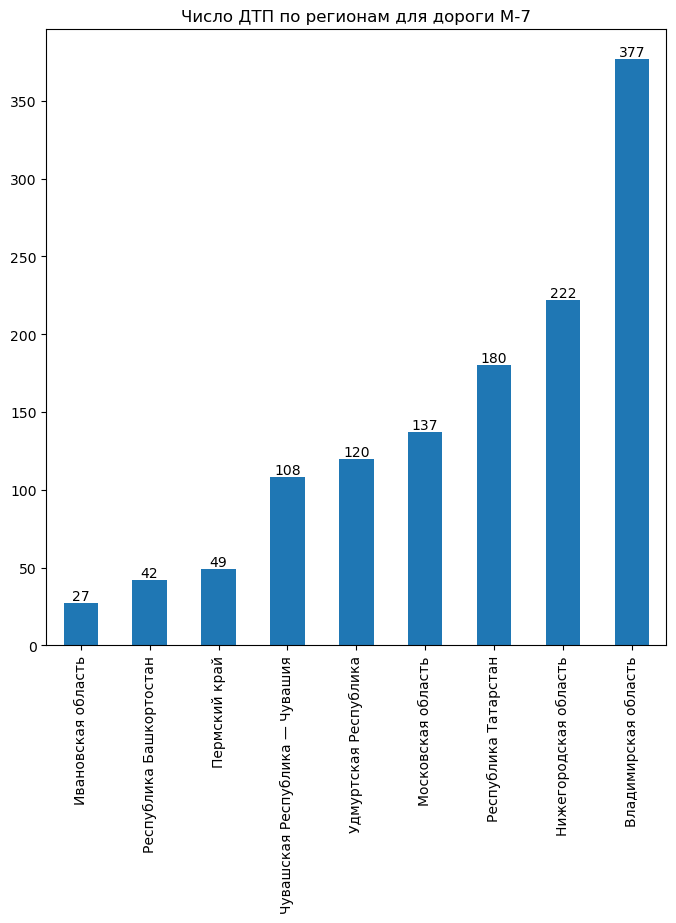

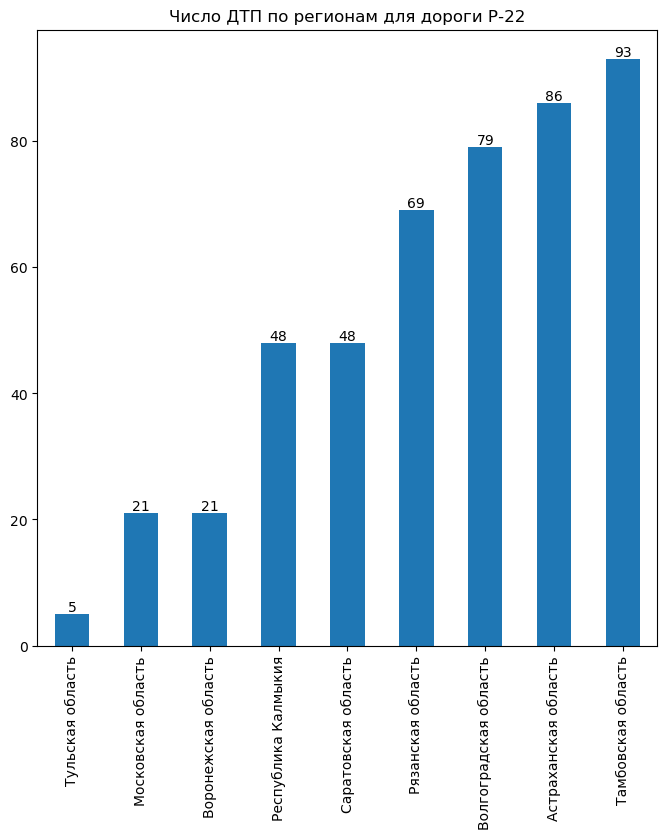

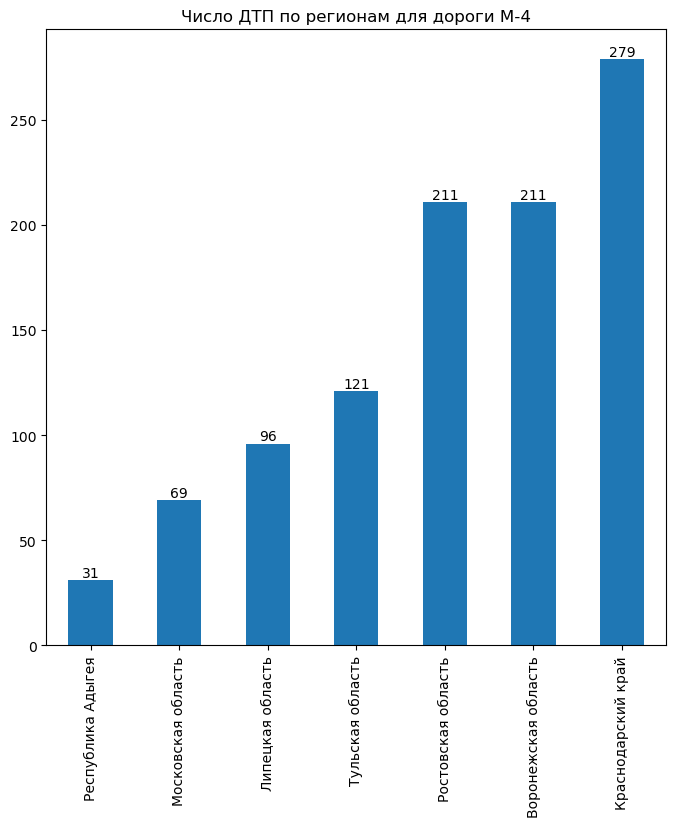

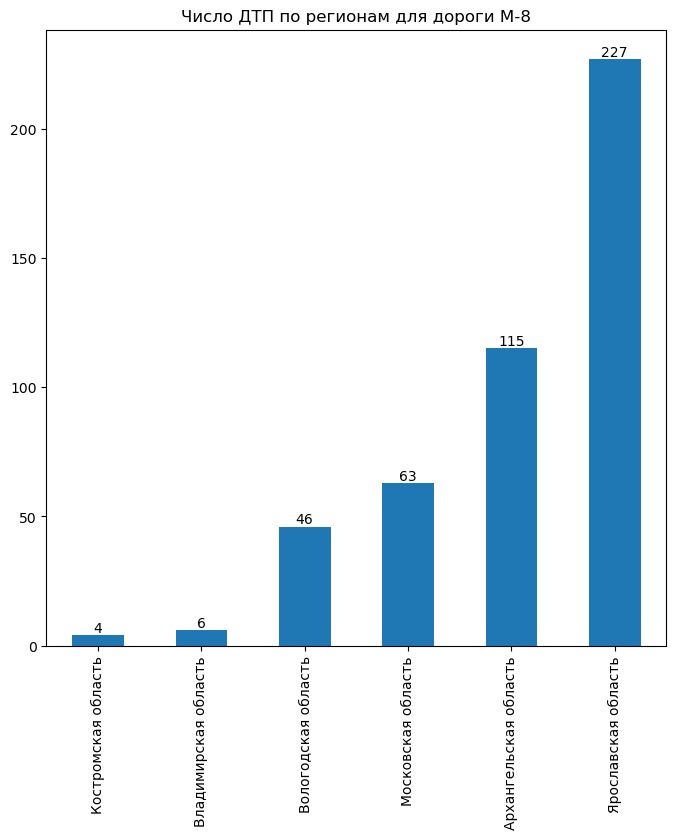

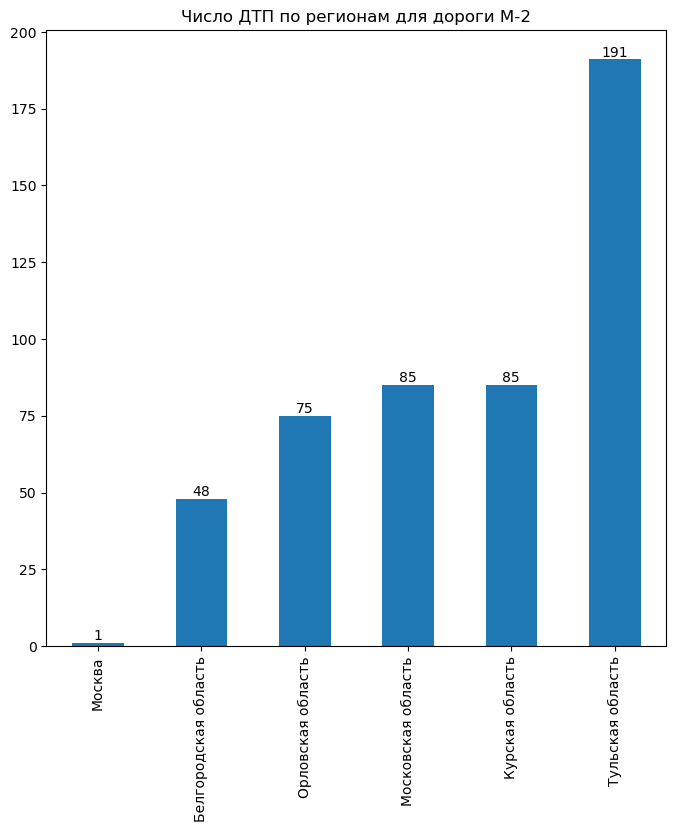

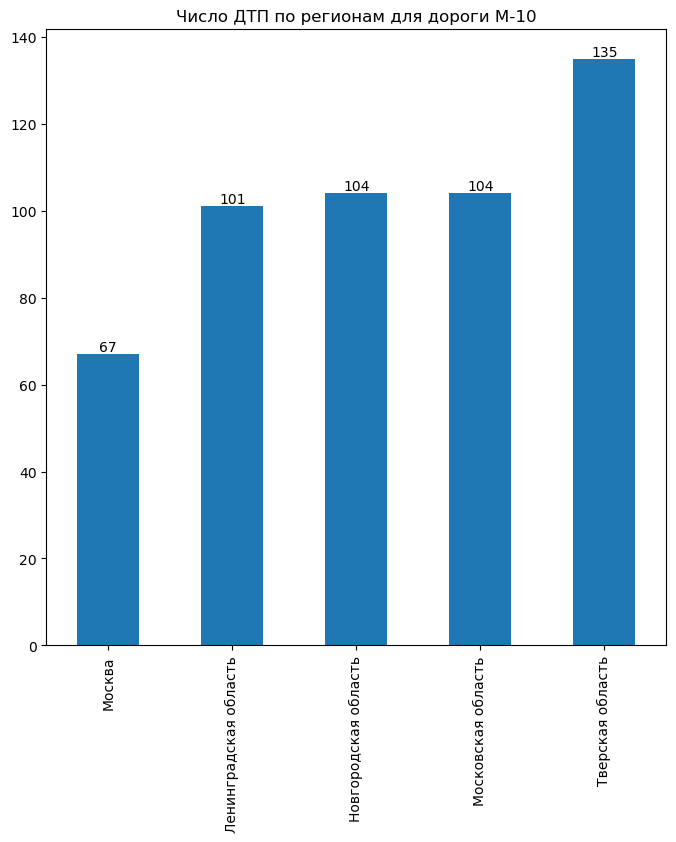

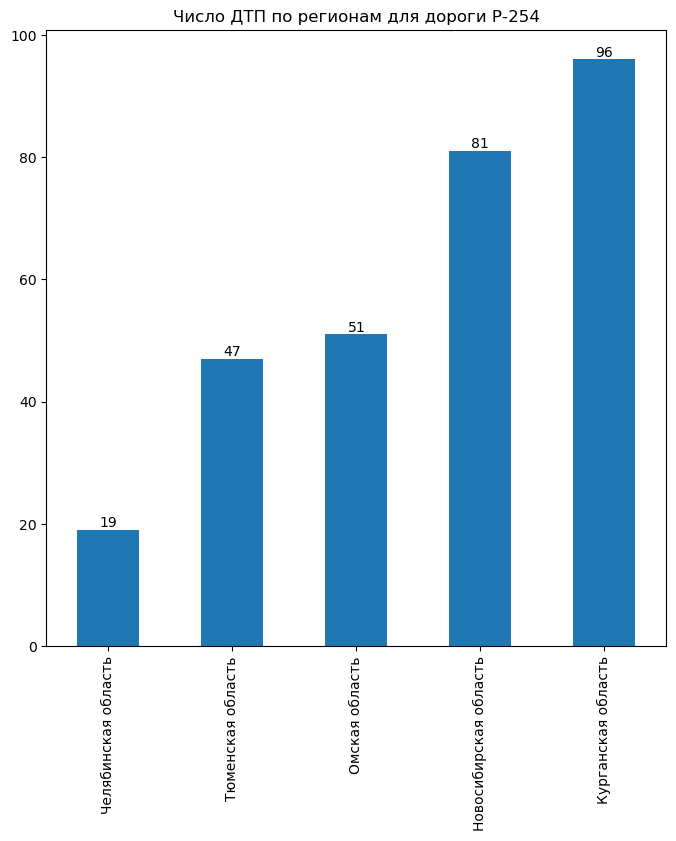

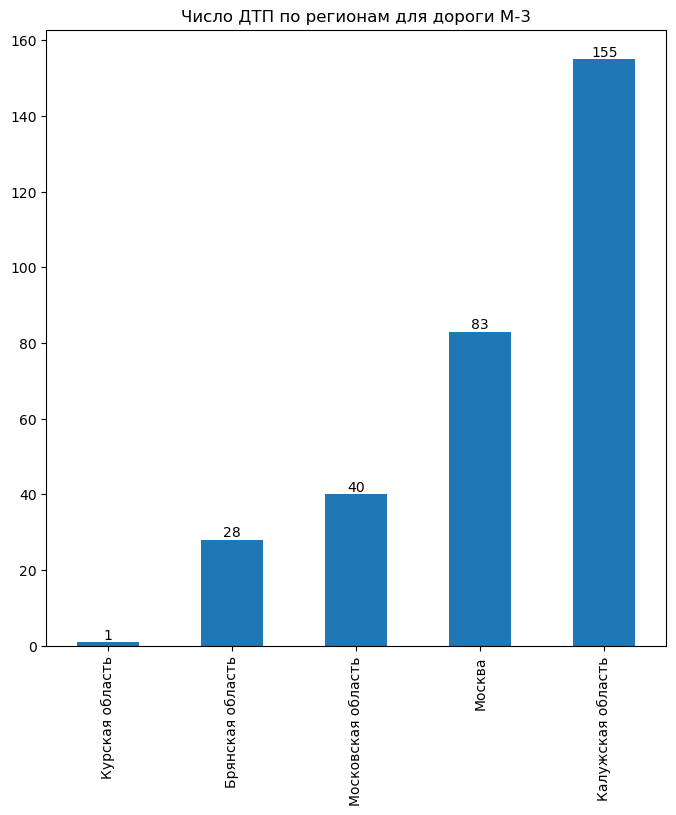

In [102]:
#3 Для каждой дороги из п.1 постоим столбчатую диаграмму распределения числа ДТП по регионам. Реализуем в цикле.
for element in top_10_roads:
    ax = data[data['road_code'] == element]['region_name'].value_counts().sort_values(ascending=True).tail(10).plot(kind='bar',
                                                figsize=(8,8),
                                                title= f'Число ДТП по регионам для дороги {element}',
                                                legend=False
                                                )
    ax.bar_label(ax.containers[0])
    plt.show()

<b>Вывод
<div class="alert alert-block alert-success">
    
1. Самая опасная (по числу погибших) федеральная дорога (1899 погибших) - М-7, самая опасная (по числу погибших) региональная дорога (27 погибших) -35А-002.<br>
2. Дорога, которая пересекает наибольшее число регионов - М-5.<br>
3. Регион с самым опасным участком дороги (то есть участком дороги с наибольшим количеством случаев ДТП) является Владимирская область (опасный участок дороги М-7, на этом участке на данной дороге произошло 380 ДТП).<br>
4. Для топ-10 дорог, пересекающих разные регионы, суммарное число погибших: 10699, суммарное число участников: 26903.<br>
5. Число ДТП по регионам (для первых 10) для топ-10 дорог, пересекающих разные регионы:
- Нижегородская область -                 222
- Ярославская область -                   227
- Ставропольский край -                   231
- Воронежская область -                   232
- Рязанская область -                     237
- Республика Дагестан -                   293
- Тульская область -                      317
- Владимирская область -                  383
- Краснодарский край -                    419
- Московская область -                    583<br>
6. Для топ-10 дорог пересекающих разные регионы постоили столбчатую диаграмму распределения числа ДТП по регионам и для каждой в отдельности из этих топ-10 дорог постоили столбчатую диаграмму распределения числа ДТП по регионам.